# Pizza Place Sales Analysis

This notebook analyzes a **year's worth of sales data** from a fictitious pizza place.  
We aim to generate **business insights** for management by exploring:

- Total sales, orders, and quantities  
- Bestselling pizzas and underperformers  
- Peak hours and day-of-week trends  
- Market basket analysis (combo opportunities)  
- Sales forecasting (future demand trends)  

---

## Initalizing the analysis by
- importing libraries, -
- setting seaborn display and
- suppressing warnings for beauiful display

In [68]:
# =============================================
# SETUP AND CONFIGURATION FOR DATA ANALYSIS
# =============================================

# Stop annoying warning messages from showing up
# (Like when your calculator shows "low battery" but you want to focus on the math)
import warnings
warnings.filterwarnings('ignore')

# =============================================
# IMPORT OUR TOOLS (like opening a toolbox)
# =============================================

# pandas - for working with data tables (like Excel spreadsheets)
import pandas as pd

# numpy - for doing math calculations with numbers
import numpy as np

# matplotlib - for creating charts and graphs
import matplotlib.pyplot as plt

# seaborn - for making prettier, more professional-looking charts
import seaborn as sns

# =============================================
# SPECIALIZED TOOLS FOR SPECIFIC JOBS
# =============================================

# Tools for "Basket Analysis" - finding what items are often bought together
# (Like noticing people who buy pizza often buy soda too)
from mlxtend.frequent_patterns import apriori, association_rules

# Tool for time series forecasting - predicting future trends based on past data
# (Like predicting how many pizzas we'll sell next month based on this month's sales)
from statsmodels.tsa.arima.model import ARIMA

# Another forecasting tool (created by Facebook) that's good for business predictions
from prophet import Prophet

# Tool for managing system messages (we import but don't use it directly here)
import logging

# =============================================
# MAKE OUR DISPLAYS LOOK PROFESSIONAL
# =============================================

# Show ALL columns when displaying data (don't hide any)
pd.set_option("display.max_columns", None)

# Show up to 100 rows of data at once
pd.set_option("display.max_rows", 100)

# Don't limit the width of our display (show full text in each column)
pd.set_option("display.width", None)

# Format numbers to show only 2 decimal places (like $12.50 instead of $12.500000)
pd.set_option("display.float_format", '{:.2f}'.format)

# =============================================
# MAKE OUR CHARTS LOOK PREMIUM AND CLEAN
# =============================================

# Use a clean white background with grid lines for charts
sns.set(style="whitegrid", palette="tab10")

# Set the font size and style for all our charts
sns.set_context("notebook", font_scale=1.1)

# Make our charts a good size: 12 inches wide by 7 inches tall
plt.rcParams['figure.figsize'] = (12, 7)

# Make our charts high quality and clear
plt.rcParams['figure.dpi'] = 100

# =============================================
# CONFIRMATION MESSAGE
# =============================================

print("Premium display settings ready for pizza analysis!")
# This message tells us everything loaded correctly and we're ready to analyze pizza data!

Premium display settings ready for pizza analysis!


## 1. Load & Merge Data
We have 4 CSV files:
- `orders.csv`  
- `order_details.csv`  
- `pizzas.csv`  
- `pizza_types.csv`  
We merge them into a single dataset for analysis.


In [69]:
# =============================================
# SMART FILE READING HELPER FUNCTION
# =============================================

def read_csv_fallback(path):
    """
    This function tries different 'languages' to read data files.
    Sometimes files are saved in different formats, so we try multiple options.
    """
    # List of different file encoding types to try (like different languages)
    encs = ['utf-8', 'ISO-8859-1', 'latin1', 'cp1252']

    # Try each encoding one by one
    for e in encs:
        try:
            # Attempt to read the file with current encoding
            return pd.read_csv(path, encoding=e)
        except Exception as ex:
            # If this encoding fails, remember the error and try the next one
            last_ex = ex

    # If ALL encodings fail, show the last error we encountered
    raise last_ex

# =============================================
# FILE LOCATIONS (WHERE OUR DATA IS STORED)
# =============================================

# These are like addresses to find our pizza sales data files
orders_path = "/content/drive/MyDrive/Pizza+Place+Sales/pizza_sales/orders.csv"           # Contains order information (who ordered when)
order_details_path = "/content/drive/MyDrive/Pizza+Place+Sales/pizza_sales/order_details.csv" # Contains what pizzas were in each order
pizzas_path = "/content/drive/MyDrive/Pizza+Place+Sales/pizza_sales/pizzas.csv"           # Contains pizza size and price information
pizza_types_path = "/content/drive/MyDrive/Pizza+Place+Sales/pizza_sales/pizza_types.csv" # Contains pizza type descriptions (ingredients, names)

# =============================================
# LOAD THE DATA INTO MEMORY
# =============================================

# Read each file using our smart helper function
orders = read_csv_fallback(orders_path)           # Load customer order information
order_details = read_csv_fallback(order_details_path) # Load order contents (which pizzas in which orders)
pizzas = read_csv_fallback(pizzas_path)           # Load pizza menu with prices
pizza_types = read_csv_fallback(pizza_types_path) # Load pizza descriptions and ingredients

# =============================================
# CLEAN UP COLUMN NAMES
# =============================================

# Clean up the column names in all four datasets
# This removes any extra spaces that might cause problems later
for df in (orders, order_details, pizzas, pizza_types):
    # Remove spaces from beginning and end of each column name
    # Example: "  order_id  " becomes "order_id"
    df.columns = [c.strip() for c in df.columns]

##Data Shapes

Lets check the shapes of our datasets to know how to merge them and see column names

In [70]:
# =============================================
# QUICK OVERVIEW OF OUR PIZZA DATA
# =============================================

# Show the size of each dataset (how many rows and columns)
print("📊 DATASET SHAPES:")
# .shape tells us (number of rows, number of columns) for each dataset
print(f"orders: {orders.shape} | order_details: {order_details.shape} | pizzas: {pizzas.shape} | pizza_types: {pizza_types.shape}")

# Print a visual separator line (26 equals signs)
print("\n" + "="*26)
print("ORDERS:")  # This dataset contains order information (who ordered when)
print("="*26)
# Show the first 5 rows of the orders data - like looking at the top of a spreadsheet
display(orders.head())

# Print a longer separator line and header for order details
print("\n" + "="*52)
print("ORDER DETAILS:")  # This shows what pizzas were in each order
print("="*52)
# Show first 5 rows of order details - like seeing the contents of recent orders
display(order_details.head())

# Print separator and header for pizzas data
print("\n" + "="*40)
print("PIZZAS:")  # This contains pizza sizes and prices
print("="*40)
# Show first 5 rows of pizza information - like looking at the menu board
display(pizzas.head())

# Print separator and header for pizza types
print("\n" + "="*100)
print("PIZZA TYPES:")  # This describes each pizza type (ingredients, names)
print("="*100)
# Show first 5 rows of pizza types - like reading pizza descriptions on a menu
display(pizza_types.head())

📊 DATASET SHAPES:
orders: (21350, 3) | order_details: (48620, 4) | pizzas: (96, 4) | pizza_types: (32, 4)

ORDERS:


,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30



ORDER DETAILS:


,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1



PIZZAS:


,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75



PIZZA TYPES:


,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."



##Merging Dataframe
  Create Datetime and
  Revenue


In [71]:
# =============================================
# COMBINE ALL OUR DATA INTO ONE BIG SPREADSHEET
# =============================================

# Step 1: Connect order details with order information
# Think of this as adding customer info to each pizza order
df = order_details.merge(orders, on='order_id', how='left')
# 'merge' combines tables, 'on order_id' means match using order numbers
# 'how=left' means keep all pizza orders even if some info is missing

# Step 2: Add pizza size and price information
df = df.merge(pizzas, on='pizza_id', how='left')
# Now we know what size each pizza was and how much it cost

# Step 3: Add pizza type descriptions (ingredients, names)
df = df.merge(pizza_types, on='pizza_type_id', how='left')
# Now we have the full pizza descriptions and ingredients

# =============================================
# CREATE A PROPER DATE AND TIME COLUMN
# =============================================

# Check if we have both date and time columns available
if 'date' in df.columns and 'time' in df.columns:
    # Combine date and time into one column
    # Example: "2023-05-15" + " " + "18:30:00" = "2023-05-15 18:30:00"
    df['OrderDate'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str), errors='coerce')
    # 'errors=coerce' means if there's bad data, just make it blank instead of crashing
else:
    # If we only have date, use that alone
    df['OrderDate'] = pd.to_datetime(df['date'], errors='coerce')

# =============================================
# MAKE SURE NUMBERS ARE ACTUAL NUMBERS
# =============================================

# Convert quantity to proper numbers (not text)
if 'quantity' in df.columns:
    df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
    # This ensures "2" becomes the number 2, not the text "2"
else:
    raise KeyError("quantity column not found in order_details.csv")
    # If quantity column is missing, stop and show an error message

# Convert price to proper numbers (not text)
if 'price' in df.columns:
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    # This ensures "16.50" becomes the number 16.50, not the text "16.50"
else:
    raise KeyError("price column not found in pizzas.csv")
    # If price column is missing, stop and show an error message

# =============================================
# CALCULATE TOTAL REVENUE FOR EACH ORDER ITEM
# =============================================

# Revenue = Quantity × Price
# Example: 2 pizzas × $16.50 each = $33.00 revenue
df['Revenue'] = df['quantity'] * df['price']

# =============================================
# CREATE HELPFUL TIME-BASED CATEGORIES
# =============================================

# Extract the hour from OrderDate (useful for analyzing busy times)
df['Hour'] = df['OrderDate'].dt.hour
# Example: 6:30 PM becomes hour 18 (6 PM in 24-hour time)

# Extract the day name (Monday, Tuesday, etc.)
df['DayOfWeek'] = df['OrderDate'].dt.day_name()
# Useful for seeing which days are busiest

# Extract just the date part (without time)
df['Date'] = df['OrderDate'].dt.date
# Good for daily summaries

# Create month-period for monthly analysis
df['MonthPeriod'] = df['OrderDate'].dt.to_period('M')
# Groups data by month (like "January 2023", "February 2023")

# =============================================
# SHOW RESULTS
# =============================================

print("Merged df shape:", df.shape)
# Shows how many rows and columns we have in our combined dataset

# Display the first few rows so we can see what our data looks like
df.head()

Merged df shape: (48620, 18)


,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,OrderDate,Revenue,Hour,DayOfWeek,Date,MonthPeriod
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01 11:38:36,13.25,11,Thursday,2015-01-01,2015-01
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01 11:57:40,16.00,11,Thursday,2015-01-01,2015-01
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01 11:57:40,18.50,11,Thursday,2015-01-01,2015-01
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01 11:57:40,20.75,11,Thursday,2015-01-01,2015-01
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01 11:57:40,16.00,11,Thursday,2015-01-01,2015-01


##Key Performers
Here we will compute:
- Total Revenue
- Total Quantity Sold
- Total Orders
- Unique Pizza Types (menu)
- Average Price

Quick EDA - getting a quick health checkup for the pizza business - all the key numbers that tell us how the business doing!


In [72]:
# =============================================
# CALCULATE KEY BUSINESS METRICS
# =============================================

# Calculate TOTAL REVENUE (all money earned from pizza sales)
total_revenue = df['Revenue'].sum(skipna=True)
# This adds up all the revenue from every pizza sold
# 'skipna=True' means ignore any blank or missing values

# Calculate TOTAL QUANTITY (total number of pizzas sold)
total_quantity = int(df['quantity'].sum(skipna=True))
# This counts every single pizza sold, converts to whole number

# Calculate TOTAL ORDERS (number of unique order IDs)
total_orders = int(df['order_id'].nunique())
# 'nunique()' counts each order only once, even if it had multiple pizzas
# Example: If order #123 had 3 pizzas, it still counts as 1 order

# Calculate UNIQUE PIZZA TYPES (different pizza varieties available)
if 'name' in df.columns:
    unique_pizza_types = int(df['name'].nunique())  # Count unique pizza names
else:
    unique_pizza_types = int(df['pizza_type_id'].nunique())  # Use type IDs if no names
# This tells us how many different pizza varieties we sell

# Calculate AVERAGE PIZZA PRICE
average_price = float(df['price'].mean())
# This finds the typical price of a pizza by averaging all pizza prices

# Calculate UNIQUE TOPPINGS COUNT (different ingredients used)
if 'ingredients' in df.columns:
    unique_toppings_count = int(
        df['ingredients']           # Take the ingredients column
        .str.split(',')             # Split by commas: "cheese,pepperoni" → ["cheese", "pepperoni"]
        .explode()                  # Break lists into separate rows
        .str.strip()                # Remove extra spaces: " cheese " → "cheese"
        .nunique()                  # Count unique ingredients
    )
else:
    unique_toppings_count = "N/A (No 'toppings' column found)"
# This tells us how many different toppings we use across all pizzas

# Calculate AVERAGE PRICE (alternative method - same as above)
avg_price = df['price'].mean()
# Another way to calculate the average pizza price

# =============================================
# DISPLAY THE BUSINESS SUMMARY
# =============================================

print(f"Total revenue: ${total_revenue:,.2f}")
# Shows total money made, formatted with commas and 2 decimal places
# Example: $1,234,567.89

print(f"Total quantity sold: {total_quantity:,}", "pizzas")
# Shows total pizzas sold, formatted with commas
# Example: 12,345 pizzas

print(f"Total orders: {total_orders:,}", "orders")
# Shows number of customer orders, formatted with commas
# Example: 4,567 orders

print(f"Unique pizza types: {unique_pizza_types}", "pizzas")
# Shows how many different pizza varieties are on the menu
# Example: 32 different pizza types

print(f"Average pizza price: ${average_price:.2f}")
# Shows the typical price of a pizza
# Example: $16.50

print(f"Unique pizza toppings: {unique_toppings_count}", "toppings")
# Shows how many different ingredients are used
# Example: 25 different toppings

print(f"The average price of a pizza is ${avg_price:.2f}")
# Confirms the average price calculation

Total revenue: $817,860.05
Total quantity sold: 49,574 pizzas
Total orders: 21,350 orders
Unique pizza types: 32 pizzas
Average pizza price: $16.49
Unique pizza toppings: 65 toppings
The average price of a pizza is $16.49


## EDA Visualizations
Peak hours, day-of-week, top pizzas, and monthly trend.


Peak Sale Hours

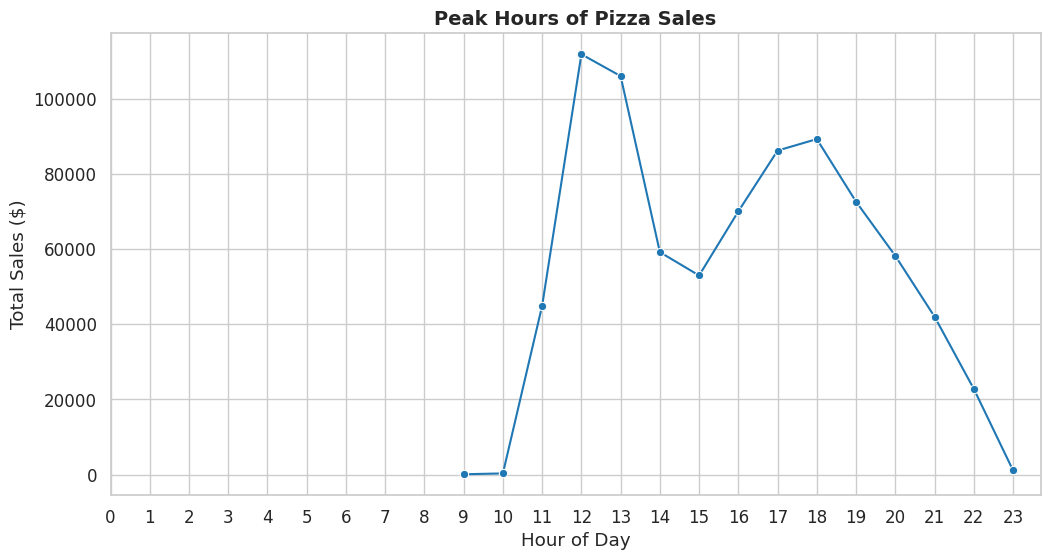

Peak sales occur at 12:00 hours.


In [73]:
# =============================================
# ANALYZE PIZZA SALES BY HOUR OF DAY
# =============================================

# Extract the hour from the order timestamp (0-23)
# Example: 6:30 PM becomes 18, 11:15 AM becomes 11
df['hour'] = df['OrderDate'].dt.hour

# Group sales by hour and calculate total revenue for each hour
# This tells us how much money we make during each hour of the day
hourly_sales = df.groupby('hour')['Revenue'].sum()
# 'groupby hour' means organize all sales by which hour they occurred
# 'Revenue.sum()' means add up all the money made during that hour

# =============================================
# CREATE THE SALES TREND CHART
# =============================================

# Set up the chart size (width: 12 inches, height: 6 inches)
plt.figure(figsize=(12,6))

# Create a line chart showing sales trends throughout the day
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker="o")
# x-axis: hours of the day (0-23)
# y-axis: total sales revenue in dollars
# marker="o" adds dots at each data point to make it easier to read

# Add chart title and labels
plt.title("Peak Hours of Pizza Sales", fontsize=14, weight="bold")
# Clear title explaining what the chart shows

plt.xlabel("Hour of Day")
# Label for x-axis - shows we're looking at time

plt.ylabel("Total Sales ($)")
# Label for y-axis - shows we're measuring money

# Set x-axis to show all 24 hours (midnight to 11 PM)
plt.xticks(range(0,24))
# This ensures we see every hour on the chart

# Display the chart
plt.show()

# =============================================
# IDENTIFY THE BUSIEST HOUR
# =============================================

# Find which hour has the highest sales
peak_hour = hourly_sales.idxmax()
# 'idxmax()' finds the hour number where sales are maximum

print(f"Peak sales occur at {peak_hour}:00 hours.")
# This tells us exactly when we make the most money

Sales peak around lunch (12–1 PM) and dinner (5–6 PM).

This helps schedule staff shifts and prepare kitchen capacity.

##Top 5 Performers

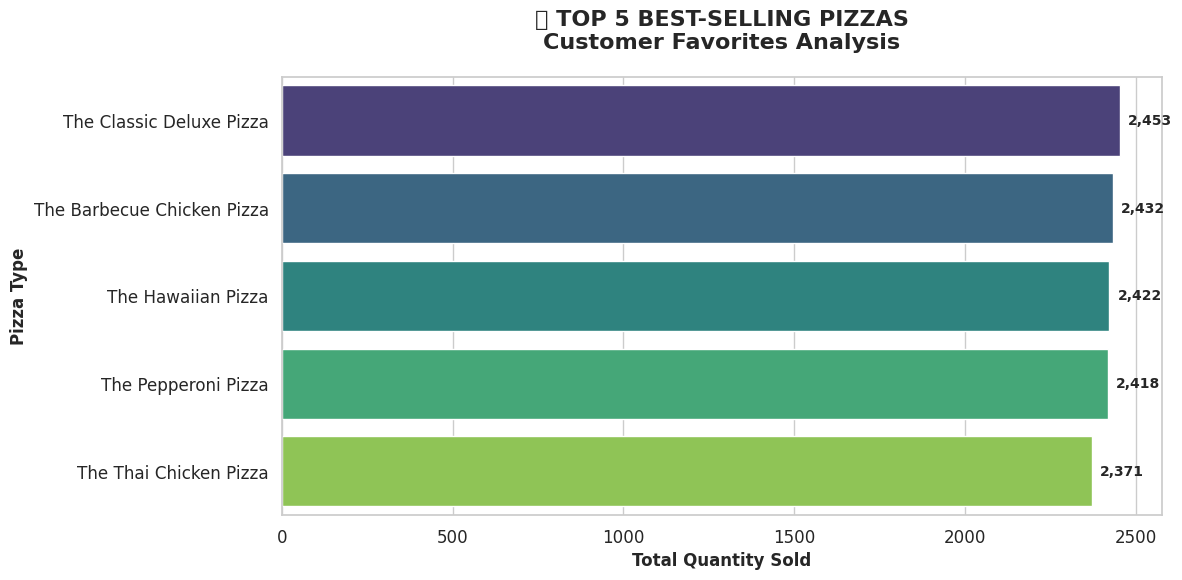


📈 BUSINESS INSIGHTS: TOP 5 PIZZAS
📊 Market Share: Top 5 pizzas represent 24.4% of total sales
🍕 Total pizzas sold across all types: 49,574
🎯 Top 5 pizzas sold: 12,096

💡 STRATEGIC RECOMMENDATIONS:
✅ Focus marketing campaigns on these proven winners
✅ Ensure ample inventory for these high-demand pizzas
✅ Train staff to efficiently prepare these popular items
✅ Consider creating combo deals featuring these top sellers

🥇 TOP PERFORMER ANALYSIS:
   🏆 The Classic Deluxe Pizza: 2,453 units (20.3% of top 5 sales)
   📈 Sales lead over #2: 21 pizzas

📋 Top 5 Ranking:
   1. The Classic Deluxe Pizza: 2,453 units (4.9% of total)
   2. The Barbecue Chicken Pizza: 2,432 units (4.9% of total)
   3. The Hawaiian Pizza: 2,422 units (4.9% of total)
   4. The Pepperoni Pizza: 2,418 units (4.9% of total)
   5. The Thai Chicken Pizza: 2,371 units (4.8% of total)


In [74]:
# =============================================
# IDENTIFY THE MOST POPULAR PIZZA TYPES
# =============================================

# Check if we have pizza names in our data
if 'name' in df.columns:

    # Calculate total sales for each pizza type and get top 5
    top5 = df.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5)
    # Step-by-step breakdown:
    # 1. groupby('name') - Group all orders by pizza name
    # 2. ['quantity'].sum() - Add up how many of each pizza were sold
    # 3. sort_values(ascending=False) - Sort from highest to lowest sales
    # 4. head(5) - Take only the top 5 best-selling pizzas

    # Create a bar chart to visualize the results
    plt.figure(figsize=(12,6))
    # Set chart size: 12 inches wide, 6 inches tall (more space for insights)

    # Create horizontal bar chart with business-focused color palette
    sns.barplot(x=top5.values, y=top5.index, palette="viridis")
    # x=top5.values - Sales quantities (bars go right/left)
    # y=top5.index - Pizza names (bars go up/down)
    # palette="viridis" - Professional green-to-purple gradient
    # Horizontal bars make long pizza names easier to read

    # Add chart titles and labels
    plt.title("🏆 TOP 5 BEST-SELLING PIZZAS\nCustomer Favorites Analysis",
              fontsize=16, weight="bold", pad=20)
    # Clear title with emoji and business focus

    plt.xlabel("Total Quantity Sold", fontsize=12, weight="bold")
    # Label for x-axis - shows we're counting number of pizzas

    plt.ylabel("Pizza Type", fontsize=12, weight="bold")
    # Label for y-axis

    # Add value labels on each bar for clarity
    for i, value in enumerate(top5.values):
        plt.text(value + (max(top5.values)*0.01), i, f'{value:,}',
                va='center', fontweight='bold', fontsize=10)

    # Display the chart
    plt.tight_layout()
    plt.show()

    # =============================================
    # BUSINESS INSIGHTS ANALYSIS
    # =============================================

    print("\n" + "="*60)
    print("📈 BUSINESS INSIGHTS: TOP 5 PIZZAS")
    print("="*60)

    # Calculate additional metrics for insights
    total_all_pizzas = df['quantity'].sum()
    top5_percentage = (top5.sum() / total_all_pizzas) * 100

    print(f"📊 Market Share: Top 5 pizzas represent {top5_percentage:.1f}% of total sales")
    print(f"🍕 Total pizzas sold across all types: {total_all_pizzas:,}")
    print(f"🎯 Top 5 pizzas sold: {top5.sum():,}")

    print("\n💡 STRATEGIC RECOMMENDATIONS:")
    print("✅ Focus marketing campaigns on these proven winners")
    print("✅ Ensure ample inventory for these high-demand pizzas")
    print("✅ Train staff to efficiently prepare these popular items")
    print("✅ Consider creating combo deals featuring these top sellers")

    print("\n🥇 TOP PERFORMER ANALYSIS:")
    champion = top5.index[0]
    champion_sales = top5.values[0]
    champion_margin = (champion_sales / top5.sum()) * 100

    print(f"   🏆 {champion}: {champion_sales:,} units ({champion_margin:.1f}% of top 5 sales)")

    # Calculate sales gap between #1 and #2
    if len(top5) > 1:
        sales_gap = top5.values[0] - top5.values[1]
        print(f"   📈 Sales lead over #2: {sales_gap:,} pizzas")

    print(f"\n📋 Top 5 Ranking:")
    for i, (pizza, sales) in enumerate(zip(top5.index, top5.values), 1):
        market_share = (sales / total_all_pizzas) * 100
        print(f"   {i}. {pizza}: {sales:,} units ({market_share:.1f}% of total)")

else:
    # If pizza names aren't available, show this message
    print("No 'name' column found in merged data for pizza types.")

##Monthly pizza  sale  trend

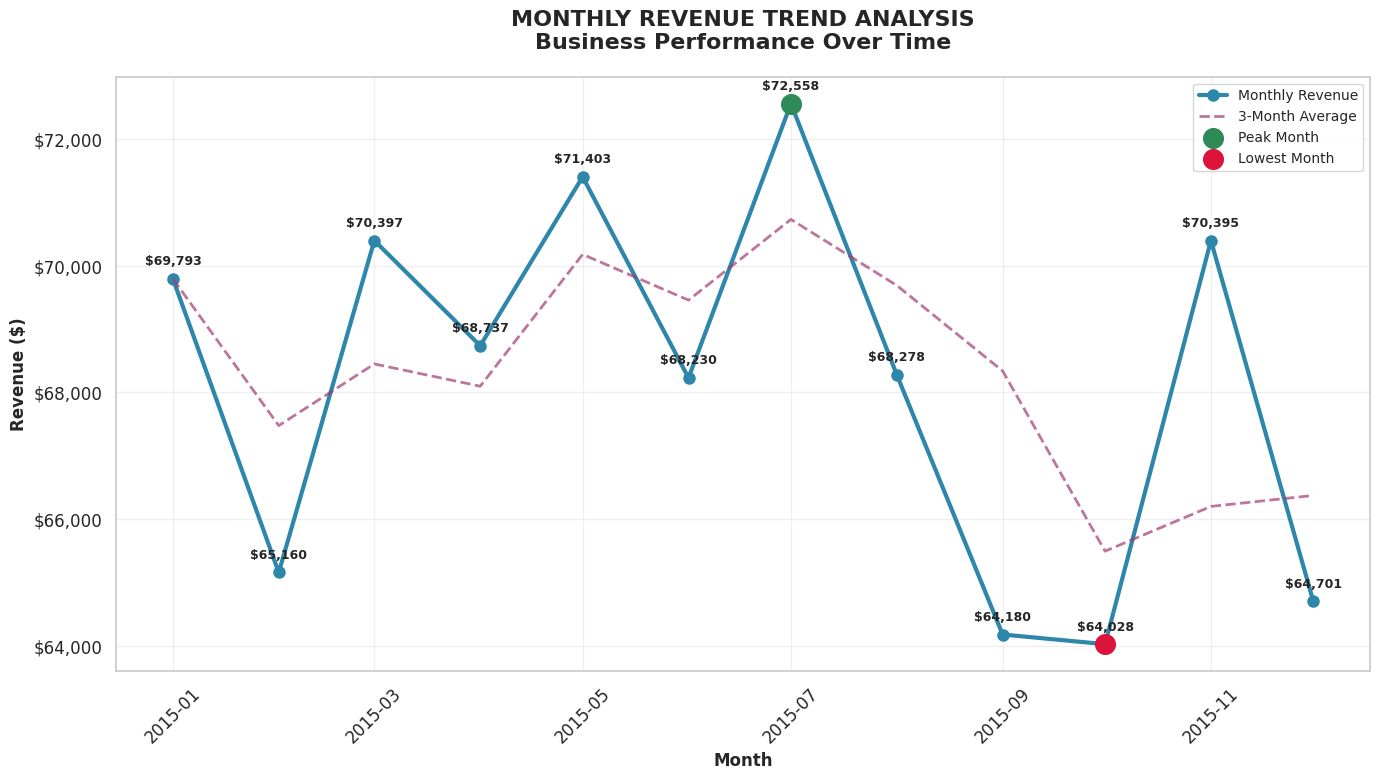


BUSINESS INSIGHTS: MONTHLY REVENUE ANALYSIS
TOTAL REVENUE: $817,860.05
Analysis Period: Jan 2015 - Dec 2015
Overall Growth: -7.3%
Average Monthly Revenue: $68,155.00

BEST PERFORMING MONTH:
   July 2015: $72,557.90
   Growth from previous month: +6.3%

LOWEST PERFORMING MONTH:
   October 2015: $64,027.60
   Growth from previous month: -0.2%

RECENT PERFORMANCE (Last 3 Months):
   Oct 2015: $64,027.60 (-0.2%) [DOWN]
   Nov 2015: $70,395.35 (+9.9%) [UP]
   Dec 2015: $64,701.15 (-8.1%) [DOWN]

STRATEGIC RECOMMENDATIONS:
1. Identify factors driving peak months for replication
2. Develop promotions for typically slower months
3. Adjust inventory and staffing based on seasonal patterns
4. Set monthly revenue targets based on historical trends

SEASONAL PATTERNS:
   Strongest season: Jul (avg: $72,558)
   Weakest season: Oct (avg: $64,028)

GROWTH CONSISTENCY:
   Months with positive growth: 4 out of 11 (36.4%)
   Revenue volatility: 4.4% (lower is more stable)


In [75]:
# =============================================
# ANALYZE MONTHLY REVENUE TRENDS
# =============================================

# Group sales data by month and calculate total revenue for each month
monthly = df.groupby(df['OrderDate'].dt.to_period('M'))['Revenue'].sum().reset_index()
# Step-by-step breakdown:
# 1. df['OrderDate'].dt.to_period('M') - Convert dates to month periods (like "Jan 2023", "Feb 2023")
# 2. groupby() - Organize all sales data by month
# 3. ['Revenue'].sum() - Add up all revenue for each month
# 4. reset_index() - Convert from special grouped format back to regular table

# Create a proper date column for plotting
monthly['month_start'] = monthly['OrderDate'].dt.to_timestamp()
# Convert month periods back to actual dates (first day of each month)
# This makes it easier to create a smooth line chart

# Calculate additional metrics for insights
monthly['growth'] = monthly['Revenue'].pct_change() * 100  # Month-over-month growth
monthly['rolling_avg'] = monthly['Revenue'].rolling(window=3, min_periods=1).mean()  # 3-month average

# =============================================
# CREATE THE REVENUE TREND CHART
# =============================================

# Set up the chart size
plt.figure(figsize=(14, 8))

# Create main revenue line with enhanced styling
plt.plot(monthly['month_start'], monthly['Revenue'],
         marker='o', linewidth=3, markersize=8, color='#2E86AB', label='Monthly Revenue')

# Add rolling average line for trend visualization
plt.plot(monthly['month_start'], monthly['rolling_avg'],
         linestyle='--', linewidth=2, color='#A23B72', alpha=0.7, label='3-Month Average')

# Add value annotations on each data point
for i, (date, revenue) in enumerate(zip(monthly['month_start'], monthly['Revenue'])):
    plt.annotate(f'${revenue:,.0f}',
                (date, revenue),
                textcoords="offset points",
                xytext=(0,10),
                ha='center',
                fontsize=9,
                fontweight='bold')

# Highlight best and worst performing months
best_month_idx = monthly['Revenue'].idxmax()
worst_month_idx = monthly['Revenue'].idxmin()

plt.scatter(monthly['month_start'].iloc[best_month_idx],
           monthly['Revenue'].iloc[best_month_idx],
           color='#2E8B57', s=200, zorder=5, label='Peak Month')
plt.scatter(monthly['month_start'].iloc[worst_month_idx],
           monthly['Revenue'].iloc[worst_month_idx],
           color='#DC143C', s=200, zorder=5, label='Lowest Month')

# Add chart title and axis labels with enhanced styling
plt.title("MONTHLY REVENUE TREND ANALYSIS\nBusiness Performance Over Time",
          fontsize=16, fontweight='bold', pad=20)

plt.xlabel("Month", fontsize=12, fontweight='bold')
plt.ylabel("Revenue ($)", fontsize=12, fontweight='bold')

# Enhance grid and styling
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Format y-axis to show dollar amounts properly
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Automatically adjust spacing
plt.tight_layout()

# Display the chart
plt.show()

# =============================================
# BUSINESS INSIGHTS ANALYSIS
# =============================================

print("\n" + "="*65)
print("BUSINESS INSIGHTS: MONTHLY REVENUE ANALYSIS")
print("="*65)

# Calculate key metrics
total_revenue = monthly['Revenue'].sum()
average_monthly = monthly['Revenue'].mean()
best_month = monthly.loc[best_month_idx]
worst_month = monthly.loc[worst_month_idx]
total_growth = ((monthly['Revenue'].iloc[-1] - monthly['Revenue'].iloc[0]) / monthly['Revenue'].iloc[0]) * 100

print(f"TOTAL REVENUE: ${total_revenue:,.2f}")
print(f"Analysis Period: {monthly['month_start'].iloc[0].strftime('%b %Y')} - {monthly['month_start'].iloc[-1].strftime('%b %Y')}")
print(f"Overall Growth: {total_growth:+.1f}%")
print(f"Average Monthly Revenue: ${average_monthly:,.2f}")

print(f"\nBEST PERFORMING MONTH:")
print(f"   {best_month['month_start'].strftime('%B %Y')}: ${best_month['Revenue']:,.2f}")
if best_month_idx > 0:
    best_growth = best_month['growth']
    print(f"   Growth from previous month: {best_growth:+.1f}%")

print(f"\nLOWEST PERFORMING MONTH:")
print(f"   {worst_month['month_start'].strftime('%B %Y')}: ${worst_month['Revenue']:,.2f}")
if worst_month_idx > 0:
    worst_growth = worst_month['growth']
    print(f"   Growth from previous month: {worst_growth:+.1f}%")

print(f"\nRECENT PERFORMANCE (Last 3 Months):")
recent_months = monthly.tail(3)
for _, month in recent_months.iterrows():
    trend_indicator = "UP" if month['growth'] > 0 else "DOWN" if month['growth'] < 0 else "FLAT"
    print(f"   {month['month_start'].strftime('%b %Y')}: ${month['Revenue']:,.2f} ({month['growth']:+.1f}%) [{trend_indicator}]")

print(f"\nSTRATEGIC RECOMMENDATIONS:")
print("1. Identify factors driving peak months for replication")
print("2. Develop promotions for typically slower months")
print("3. Adjust inventory and staffing based on seasonal patterns")
print("4. Set monthly revenue targets based on historical trends")

# Seasonal pattern detection
if len(monthly) >= 12:
    print(f"\nSEASONAL PATTERNS:")
    # Simple seasonal analysis - compare same months across years
    monthly['month_num'] = monthly['month_start'].dt.month
    seasonal_avg = monthly.groupby('month_num')['Revenue'].mean()

    best_seasonal = seasonal_avg.idxmax()
    worst_seasonal = seasonal_avg.idxmin()

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    print(f"   Strongest season: {months[best_seasonal-1]} (avg: ${seasonal_avg[best_seasonal]:,.0f})")
    print(f"   Weakest season: {months[worst_seasonal-1]} (avg: ${seasonal_avg[worst_seasonal]:,.0f})")

# Growth consistency analysis
positive_growth_months = (monthly['growth'] > 0).sum()
total_months = len(monthly) - 1  # Exclude first month (no growth calculation)
growth_consistency = (positive_growth_months / total_months) * 100

print(f"\nGROWTH CONSISTENCY:")
print(f"   Months with positive growth: {positive_growth_months} out of {total_months} ({growth_consistency:.1f}%)")

# Volatility analysis
revenue_std = monthly['Revenue'].std()
coefficient_of_variation = (revenue_std / average_monthly) * 100
print(f"   Revenue volatility: {coefficient_of_variation:.1f}% (lower is more stable)")

##Sales by Day of the Week

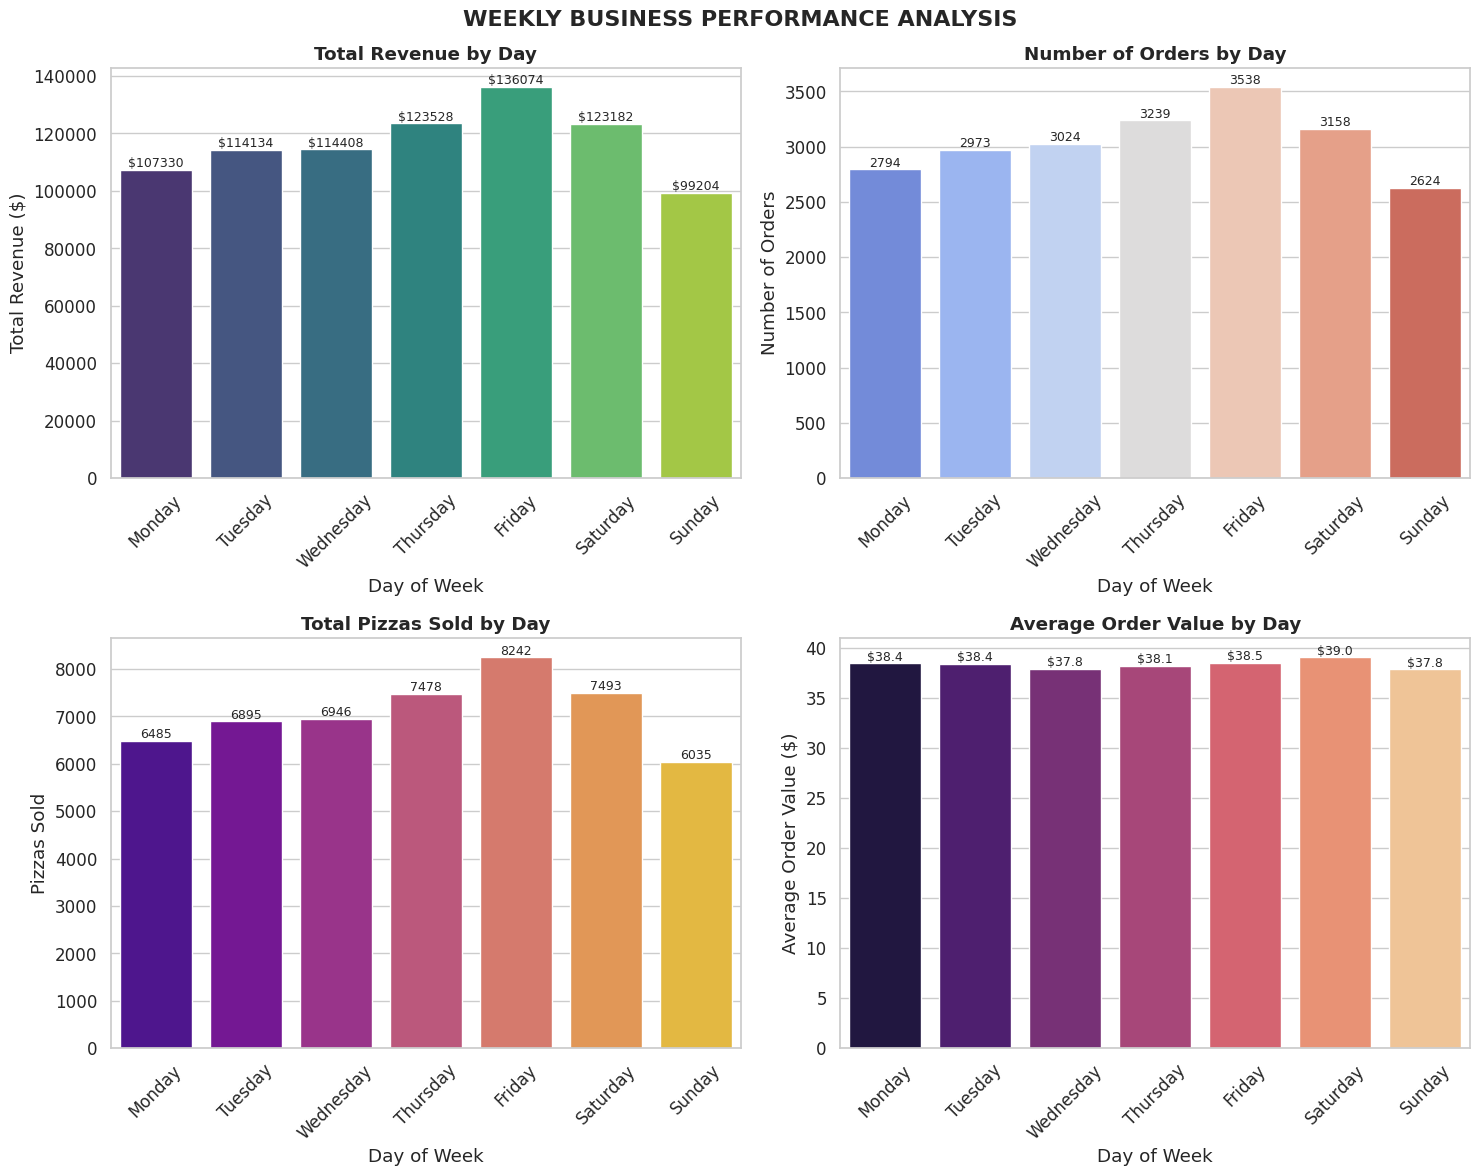


BUSINESS INSIGHTS: WEEKLY PERFORMANCE ANALYSIS
WEEKLY PERFORMANCE SUMMARY:
Total Weekly Revenue: $817,860.05
Average Daily Revenue: $116,837.15
Weekend (Fri-Sun) Revenue: $358,459.80
Weekday (Mon-Thu) Revenue: $459,400.25

PEAK PERFORMANCE ANALYSIS:
Highest Revenue Day: Friday ($136,073.90)
Lowest Revenue Day: Sunday ($99,203.50)
Busiest Order Day: Friday (3538 orders)
Highest Average Order Value: Saturday ($39.01)

REVENUE DISTRIBUTION BY DAY:
  Monday   : $107,329.55 (13.1% of weekly total)
  Tuesday  : $114,133.80 (14.0% of weekly total)
  Wednesday: $114,408.40 (14.0% of weekly total)
  Thursday : $123,528.50 (15.1% of weekly total)
  Friday   : $136,073.90 (16.6% of weekly total)
  Saturday : $123,182.40 (15.1% of weekly total)
  Sunday   : $99,203.50 (12.1% of weekly total)

WEEKEND VS WEEKDAY ANALYSIS:
  Weekend Revenue (Fri-Sun): $358,459.80 (43.8%)
  Weekday Revenue (Mon-Thu): $459,400.25 (56.2%)

STRATEGIC RECOMMENDATIONS:
1. Relatively consistent daily revenue - maintain cu

In [76]:
# =============================================
# ANALYZE WHICH DAYS OF THE WEEK ARE BUSIEST
# =============================================

# Extract the day name from each order date
df['weekday'] = df['OrderDate'].dt.day_name()

# Calculate total sales and order count for each day of the week
weekday_analysis = df.groupby('weekday').agg({
    'Revenue': 'sum',
    'order_id': 'nunique',
    'quantity': 'sum'
}).reset_index()

# Calculate average order value per day
weekday_analysis['avg_order_value'] = weekday_analysis['Revenue'] / weekday_analysis['order_id']

# Reorder the days to follow the natural week sequence
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_analysis['weekday'] = pd.Categorical(weekday_analysis['weekday'], categories=weekday_order, ordered=True)
weekday_analysis = weekday_analysis.sort_values('weekday')

# =============================================
# CREATE VISUAL CHARTS OF WEEKLY PERFORMANCE
# =============================================

# Create subplots for comprehensive analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('WEEKLY BUSINESS PERFORMANCE ANALYSIS', fontsize=16, fontweight='bold', y=0.98)

# Chart 1: Total Revenue by Day
sns.barplot(data=weekday_analysis, x='weekday', y='Revenue', ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Total Revenue by Day', fontweight='bold')
axes[0,0].set_xlabel('Day of Week')
axes[0,0].set_ylabel('Total Revenue ($)')
axes[0,0].tick_params(axis='x', rotation=45)
# Add value labels on bars
for container in axes[0,0].containers:
    axes[0,0].bar_label(container, fmt='$%.0f', fontsize=9)

# Chart 2: Number of Orders by Day
sns.barplot(data=weekday_analysis, x='weekday', y='order_id', ax=axes[0,1], palette='coolwarm')
axes[0,1].set_title('Number of Orders by Day', fontweight='bold')
axes[0,1].set_xlabel('Day of Week')
axes[0,1].set_ylabel('Number of Orders')
axes[0,1].tick_params(axis='x', rotation=45)
# Add value labels on bars
for container in axes[0,1].containers:
    axes[0,1].bar_label(container, fmt='%.0f', fontsize=9)

# Chart 3: Total Pizzas Sold by Day
sns.barplot(data=weekday_analysis, x='weekday', y='quantity', ax=axes[1,0], palette='plasma')
axes[1,0].set_title('Total Pizzas Sold by Day', fontweight='bold')
axes[1,0].set_xlabel('Day of Week')
axes[1,0].set_ylabel('Pizzas Sold')
axes[1,0].tick_params(axis='x', rotation=45)
# Add value labels on bars
for container in axes[1,0].containers:
    axes[1,0].bar_label(container, fmt='%.0f', fontsize=9)

# Chart 4: Average Order Value by Day
sns.barplot(data=weekday_analysis, x='weekday', y='avg_order_value', ax=axes[1,1], palette='magma')
axes[1,1].set_title('Average Order Value by Day', fontweight='bold')
axes[1,1].set_xlabel('Day of Week')
axes[1,1].set_ylabel('Average Order Value ($)')
axes[1,1].tick_params(axis='x', rotation=45)
# Add value labels on bars
for container in axes[1,1].containers:
    axes[1,1].bar_label(container, fmt='$%.1f', fontsize=9)

plt.tight_layout()
plt.show()

# ==========================
# BUSINESS INSIGHTS ANALYSIS
# ==========================

print("\n" + "="*46)
print("BUSINESS INSIGHTS: WEEKLY PERFORMANCE ANALYSIS")
print("="*46)

# Calculate key metrics
total_weekly_revenue = weekday_analysis['Revenue'].sum()
avg_daily_revenue = weekday_analysis['Revenue'].mean()

# Find best and worst performing days
best_revenue_day = weekday_analysis.loc[weekday_analysis['Revenue'].idxmax()]
worst_revenue_day = weekday_analysis.loc[weekday_analysis['Revenue'].idxmin()]
best_order_day = weekday_analysis.loc[weekday_analysis['order_id'].idxmax()]
best_avg_value_day = weekday_analysis.loc[weekday_analysis['avg_order_value'].idxmax()]

print(f"WEEKLY PERFORMANCE SUMMARY:")
print(f"Total Weekly Revenue: ${total_weekly_revenue:,.2f}")
print(f"Average Daily Revenue: ${avg_daily_revenue:,.2f}")
print(f"Weekend (Fri-Sun) Revenue: ${weekday_analysis[weekday_analysis['weekday'].isin(['Friday', 'Saturday', 'Sunday'])]['Revenue'].sum():,.2f}")
print(f"Weekday (Mon-Thu) Revenue: ${weekday_analysis[weekday_analysis['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday'])]['Revenue'].sum():,.2f}")

print(f"\nPEAK PERFORMANCE ANALYSIS:")
print(f"Highest Revenue Day: {best_revenue_day['weekday']} (${best_revenue_day['Revenue']:,.2f})")
print(f"Lowest Revenue Day: {worst_revenue_day['weekday']} (${worst_revenue_day['Revenue']:,.2f})")
print(f"Busiest Order Day: {best_order_day['weekday']} ({best_order_day['order_id']:.0f} orders)")
print(f"Highest Average Order Value: {best_avg_value_day['weekday']} (${best_avg_value_day['avg_order_value']:.2f})")

print(f"\nREVENUE DISTRIBUTION BY DAY:")
for _, day in weekday_analysis.iterrows():
    day_percentage = (day['Revenue'] / total_weekly_revenue) * 100
    print(f"  {day['weekday']:9}: ${day['Revenue']:>8,.2f} ({day_percentage:4.1f}% of weekly total)")

print(f"\nWEEKEND VS WEEKDAY ANALYSIS:")
weekend_revenue = weekday_analysis[weekday_analysis['weekday'].isin(['Friday', 'Saturday', 'Sunday'])]['Revenue'].sum()
weekday_revenue = weekday_analysis[weekday_analysis['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday'])]['Revenue'].sum()
weekend_percentage = (weekend_revenue / total_weekly_revenue) * 100
weekday_percentage = (weekday_revenue / total_weekly_revenue) * 100

print(f"  Weekend Revenue (Fri-Sun): ${weekend_revenue:,.2f} ({weekend_percentage:.1f}%)")
print(f"  Weekday Revenue (Mon-Thu): ${weekday_revenue:,.2f} ({weekday_percentage:.1f}%)")

print(f"\nSTRATEGIC RECOMMENDATIONS:")

# Generate dynamic recommendations based on patterns
revenue_range = weekday_analysis['Revenue'].max() - weekday_analysis['Revenue'].min()
if revenue_range / weekday_analysis['Revenue'].mean() > 0.5:
    print("1. Significant revenue variation detected - implement day-specific strategies")
else:
    print("1. Relatively consistent daily revenue - maintain current operations")

if weekend_percentage > 60:
    print("2. Heavy weekend dependency - consider weekday promotions to balance demand")
else:
    print("2. Balanced weekly distribution - current schedule appears optimal")

# Staffing recommendations
busiest_days = weekday_analysis.nlargest(3, 'order_id')['weekday'].tolist()
print(f"3. Focus staffing on: {', '.join(busiest_days)} (highest order volume)")

# Inventory recommendations
high_quantity_days = weekday_analysis.nlargest(2, 'quantity')['weekday'].tolist()
print(f"4. Increase inventory preparation for: {', '.join(high_quantity_days)}")

# Marketing recommendations
slow_days = weekday_analysis.nsmallest(2, 'Revenue')['weekday'].tolist()
print(f"5. Target promotions on: {', '.join(slow_days)} to boost off-peak sales")

print(f"\nPERFORMANCE GAPS:")
best_day_revenue = weekday_analysis['Revenue'].max()
worst_day_revenue = weekday_analysis['Revenue'].min()
revenue_gap = best_day_revenue - worst_day_revenue
gap_percentage = (revenue_gap / best_day_revenue) * 100

print(f"  Revenue gap between best and worst day: ${revenue_gap:,.2f} ({gap_percentage:.1f}% of best day)")
print(f"  Opportunity: Improving worst day by 25% would add ${worst_day_revenue * 0.25:,.2f} weekly")

#Weakest Performers by Name

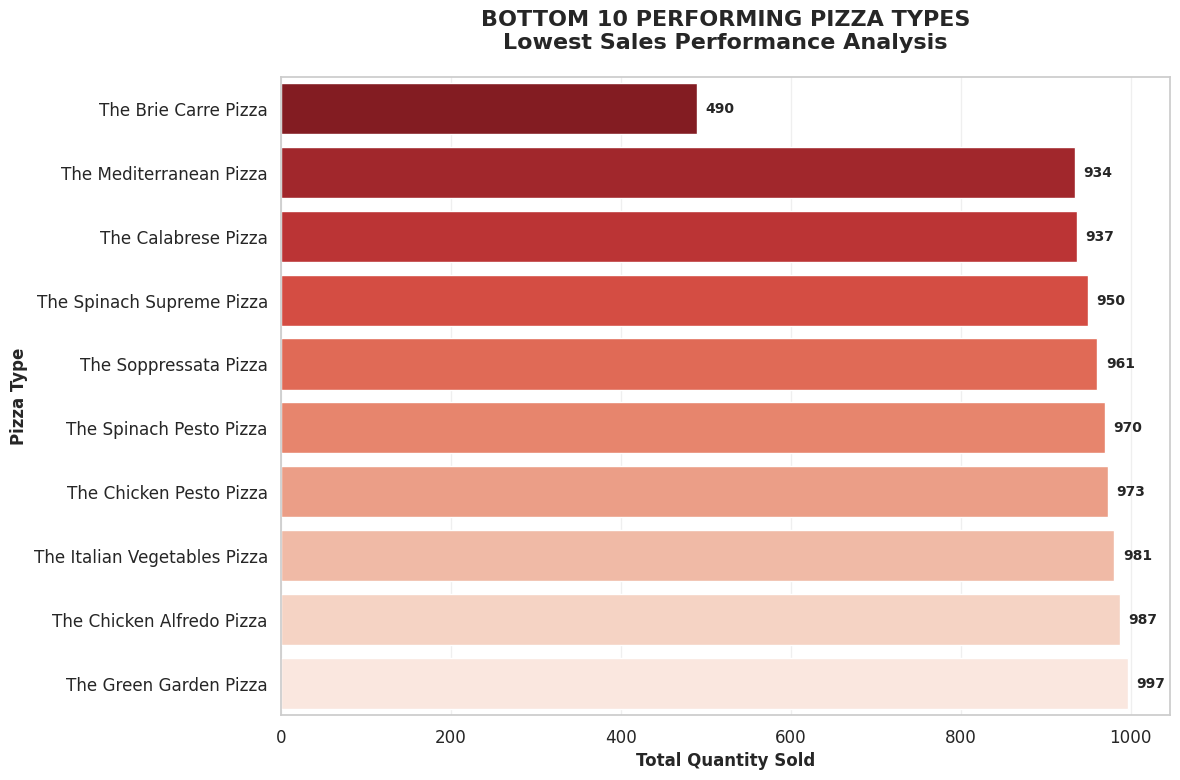


BUSINESS INSIGHTS: LOW PERFORMING PIZZA ANALYSIS
PERFORMANCE OVERVIEW:
Total pizzas sold across all types: 49,574
Bottom 10 pizzas sold: 9,180
Market share of bottom 10: 18.52%

BOTTOM 10 PIZZAS BY SALES VOLUME:
   1. The Brie Carre Pizza            490 units (0.99%)
   2. The Mediterranean Pizza         934 units (1.88%)
   3. The Calabrese Pizza             937 units (1.89%)
   4. The Spinach Supreme Pizza       950 units (1.92%)
   5. The Soppressata Pizza           961 units (1.94%)
   6. The Spinach Pesto Pizza         970 units (1.96%)
   7. The Chicken Pesto Pizza         973 units (1.96%)
   8. The Italian Vegetables Pizza    981 units (1.98%)
   9. The Chicken Alfredo Pizza       987 units (1.99%)
  10. The Green Garden Pizza          997 units (2.01%)

PERFORMANCE COMPARISON:
Top 10 pizzas sold: 22,159 units
Bottom 10 pizzas sold: 9,180 units
Performance gap: 12,979 units
Top performers outsell bottom performers by 2.4x

WORST PERFORMER ANALYSIS:
Lowest selling pizza: The Br

In [77]:
# =================================
# IDENTIFY THE LEAST POPULAR PIZZAS
# =================================

# Group data by pizza name and sum up total quantities sold for each type
pizza_sales = df.groupby("name")["quantity"].sum().reset_index()
# Step-by-step:
# 1. groupby("name") - Group all orders by pizza type
# 2. ["quantity"].sum() - Add up how many of each pizza were sold
# 3. reset_index() - Convert from special format back to regular table

# Sort the pizzas from lowest to highest sales
pizza_sales = pizza_sales.sort_values(by="quantity", ascending=True)
# 'ascending=True' means smallest numbers first (least sold pizzas at the top)

# Select the bottom 10 performers (the least sold pizzas)
low_performers = pizza_sales.head(10)

# Calculate additional metrics for insights
total_pizzas_sold = pizza_sales['quantity'].sum()
low_performers_total = low_performers['quantity'].sum()
low_performers_percentage = (low_performers_total / total_pizzas_sold) * 100

# =========================================
# CREATE CHART SHOWING LEAST POPULAR PIZZAS
# =========================================

# Set up chart size
plt.figure(figsize=(12, 8))

# Create horizontal bar chart for the low performers
bars = sns.barplot(data=low_performers, x="quantity", y="name", palette="Reds_r")
# data=low_performers - Use our bottom 10 pizzas data
# x="quantity" - Sales numbers on the x-axis
# y="name" - Pizza names on the y-axis
# palette="Reds_r" - Red color gradient (darker red = even lower sales)

# Add value labels on each bar
for i, (value, name) in enumerate(zip(low_performers['quantity'], low_performers['name'])):
    plt.text(value + (max(low_performers['quantity']) * 0.01),
             i, f'{value:,}', va='center', fontweight='bold', fontsize=10)

# Add chart titles and labels
plt.title("BOTTOM 10 PERFORMING PIZZA TYPES\nLowest Sales Performance Analysis",
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Total Quantity Sold", fontsize=12, fontweight='bold')
plt.ylabel("Pizza Type", fontsize=12, fontweight='bold')

# Add grid for better readability
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# ===========================
# BUSINESS INSIGHTS ANALYSIS
# =============================

print("\n" + "="*70)
print("BUSINESS INSIGHTS: LOW PERFORMING PIZZA ANALYSIS")
print("="*70)

print(f"PERFORMANCE OVERVIEW:")
print(f"Total pizzas sold across all types: {total_pizzas_sold:,}")
print(f"Bottom 10 pizzas sold: {low_performers_total:,}")
print(f"Market share of bottom 10: {low_performers_percentage:.2f}%")

print(f"\nBOTTOM 10 PIZZAS BY SALES VOLUME:")
for i, (_, pizza) in enumerate(low_performers.iterrows(), 1):
    percentage = (pizza['quantity'] / total_pizzas_sold) * 100
    print(f"  {i:2}. {pizza['name']:30} {pizza['quantity']:4} units ({percentage:.2f}%)")

# Calculate performance gaps
top_10_pizzas = pizza_sales.tail(10)
top_performers_total = top_10_pizzas['quantity'].sum()
performance_gap = top_performers_total - low_performers_total
gap_ratio = top_performers_total / low_performers_total if low_performers_total > 0 else float('inf')

print(f"\nPERFORMANCE COMPARISON:")
print(f"Top 10 pizzas sold: {top_performers_total:,} units")
print(f"Bottom 10 pizzas sold: {low_performers_total:,} units")
print(f"Performance gap: {performance_gap:,} units")
print(f"Top performers outsell bottom performers by {gap_ratio:.1f}x")

# Analyze potential issues
worst_pizza = low_performers.iloc[0]
best_selling_pizza = pizza_sales.iloc[-1]

print(f"\nWORST PERFORMER ANALYSIS:")
print(f"Lowest selling pizza: {worst_pizza['name']}")
print(f"Units sold: {worst_pizza['quantity']:,}")
print(f"Compared to best seller ({best_selling_pizza['name']}): {best_selling_pizza['quantity'] / worst_pizza['quantity']:.1f}x difference")

# Calculate revenue impact (assuming we have price data)
if 'price' in df.columns:
    # Get average price for each low-performing pizza
    pizza_prices = df.groupby('name')['price'].mean().reset_index()
    low_performers_with_price = low_performers.merge(pizza_prices, on='name')

    total_low_performer_revenue = (low_performers_with_price['quantity'] * low_performers_with_price['price']).sum()
    avg_price_low = low_performers_with_price['price'].mean()

    print(f"\nREVENUE IMPACT ANALYSIS:")
    print(f"Estimated revenue from bottom 10 pizzas: ${total_low_performer_revenue:,.2f}")
    print(f"Average price of low-performing pizzas: ${avg_price_low:.2f}")

print(f"\nSTRATEGIC RECOMMENDATIONS:")

# Generate dynamic recommendations
if low_performers_percentage < 5:
    print("1. LOW IMPACT - Bottom 10 represent less than 5% of total sales")
    print("   Consider keeping for menu variety with minimal inventory impact")
else:
    print("1. SIGNIFICANT IMPACT - Bottom 10 represent substantial portion of sales")
    print("   Immediate review and action recommended")

# Check if any low performers are specialty or premium pizzas
specialty_keywords = ['gourmet', 'premium', 'special', 'artisan', 'signature']
low_performer_names = low_performers['name'].str.lower()

has_specialty = any(any(keyword in name for keyword in specialty_keywords)
                   for name in low_performer_names)

if has_specialty:
    print("2. SPECIALTY ITEMS DETECTED - Review pricing and marketing strategy")
    print("   Consider: Better promotion, recipe improvement, or price adjustment")
else:
    print("2. STANDARD ITEMS UNDERPERFORMING - Consider menu simplification")
    print("   Potential candidates for removal or replacement")

print("3. INVENTORY OPTIMIZATION:")
print("   Reduce ingredient orders for these low-demand items")
print("   Reallocate kitchen space and preparation time to top performers")

print("4. MENU ENGINEERING:")
print("   Test removing 2-3 worst performers and monitor customer feedback")
print("   Consider seasonal replacements or limited-time offers")

print("5. CUSTOMER RESEARCH:")
print("   Survey customers to understand why these pizzas are unpopular")
print("   Consider taste tests or recipe modifications")

# Opportunity cost analysis
print(f"\nOPPORTUNITY ANALYSIS:")
avg_pizza_price = df['price'].mean() if 'price' in df.columns else 15  # Fallback estimate
potential_improvement = low_performers_total * 0.5  # 50% improvement scenario
revenue_opportunity = potential_improvement * avg_pizza_price

print(f"  50% sales improvement scenario: {potential_improvement:.0f} additional units")
print(f"  Estimated revenue opportunity: ${revenue_opportunity:,.2f}")
print(f"  Focus improvement efforts on top 3 worst performers for maximum impact")

# Display the data table
print(f"\nDETAILED PERFORMANCE DATA:")
print(low_performers.to_string(index=False))

#Weakest performing pizzas + sizes

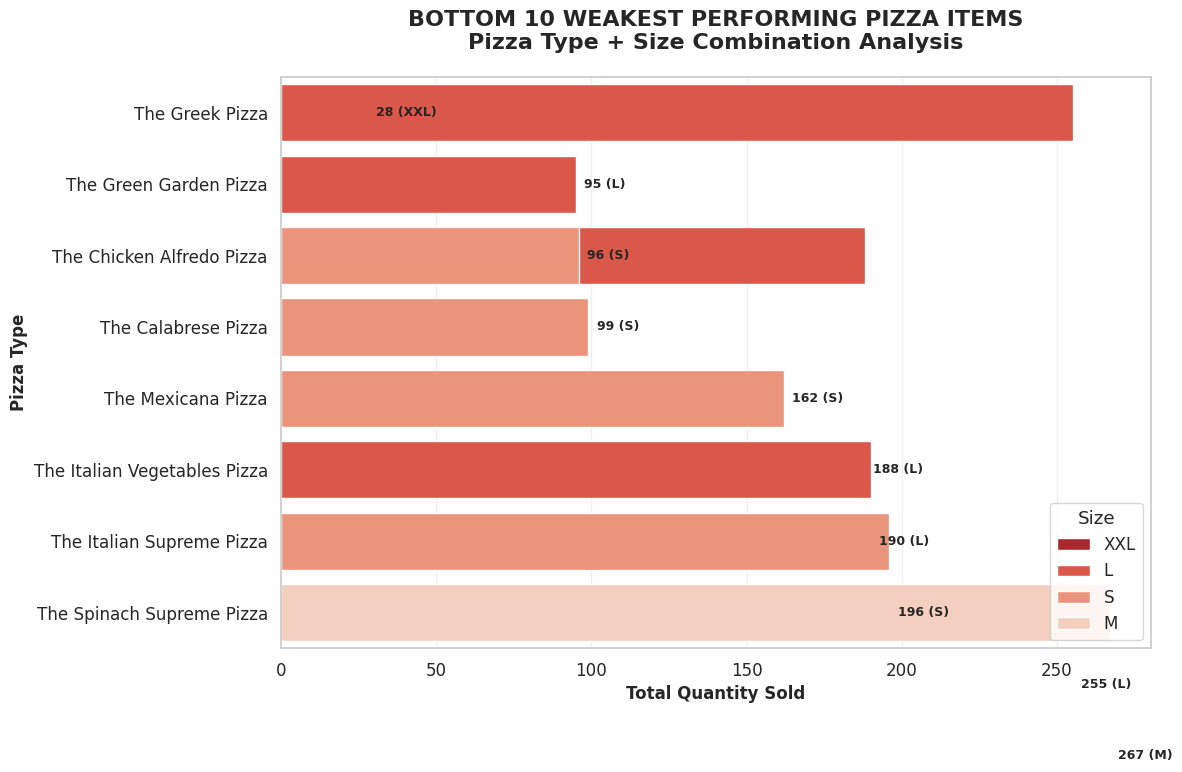


BUSINESS INSIGHTS: WEAK PIZZA COMBINATION ANALYSIS
PERFORMANCE OVERVIEW:
Total pizza combinations available: 91
Total units sold across all combinations: 49,574
Average units per combination: 544.8
Bottom 10 combinations sold: 1,576 units
Market share of bottom 10 combinations: 3.18%

BOTTOM 10 PIZZA COMBINATIONS BY SALES:
   1. The Greek Pizza           XXL       28 units (0.056%)
   2. The Green Garden Pizza    L         95 units (0.192%)
   3. The Chicken Alfredo Pizza S         96 units (0.194%)
   4. The Calabrese Pizza       S         99 units (0.200%)
   5. The Mexicana Pizza        S        162 units (0.327%)
   6. The Chicken Alfredo Pizza L        188 units (0.379%)
   7. The Italian Vegetables Pizza L        190 units (0.383%)
   8. The Italian Supreme Pizza S        196 units (0.395%)
   9. The Greek Pizza           L        255 units (0.514%)
  10. The Spinach Supreme Pizza M        267 units (0.539%)

SIZE DISTRIBUTION IN WEAK PERFORMERS:
  L: 4 combinations
  S: 4 combi

,name,size,quantity
27,The Greek Pizza,XXL,28
28,The Green Garden Pizza,L,95
13,The Chicken Alfredo Pizza,S,96
7,The Calabrese Pizza,S,99
48,The Mexicana Pizza,S,162
11,The Chicken Alfredo Pizza,L,188
40,The Italian Vegetables Pizza,L,190
39,The Italian Supreme Pizza,S,196
23,The Greek Pizza,L,255
80,The Spinach Supreme Pizza,M,267


In [78]:
# =============================================
# IDENTIFY THE LEAST POPULAR PIZZA COMBINATIONS
# =============================================

# Group data by both pizza name AND size, then sum quantities sold
pizza_item_sales = df.groupby(["name", "size"])["quantity"].sum().reset_index()
# Step-by-step:
# 1. groupby(["name", "size"]) - Group by both pizza type AND size (like "Pepperoni-Large", "Pepperoni-Medium")
# 2. ["quantity"].sum() - Add up how many of each specific combination were sold
# 3. reset_index() - Convert back to regular table format

# Calculate additional metrics for comprehensive analysis
total_combinations_sold = pizza_item_sales['quantity'].sum()
avg_per_combination = pizza_item_sales['quantity'].mean()

# Sort from lowest to highest sales to find the worst performers
weakest_pizzas = pizza_item_sales.sort_values(by="quantity", ascending=True).head(10)
# 'ascending=True' puts smallest numbers first (least sold items at top)
# head(10) takes the 10 worst-selling pizza combinations

# Calculate performance metrics for weakest combinations
weakest_total = weakest_pizzas['quantity'].sum()
weakest_percentage = (weakest_total / total_combinations_sold) * 100

# =============================================
# CREATE CHART SHOWING LEAST POPULAR COMBINATIONS
# =============================================

# Set up chart size
plt.figure(figsize=(12, 8))

# Create horizontal bar chart showing pizza name and size
bars = sns.barplot(data=weakest_pizzas, x="quantity", y="name", hue="size", dodge=False, palette="Reds_r")
# data=weakest_pizzas - Use our bottom 10 performers data
# x="quantity" - Sales numbers on x-axis
# y="name" - Pizza names on y-axis
# hue="size" - Color bars differently based on pizza size
# dodge=False - All bars appear on same line (not side-by-side)
# palette="Reds_r" - Red color gradient (warning colors for poor performance)

# Add value labels on each bar
for i, (idx, row) in enumerate(weakest_pizzas.iterrows()):
    plt.text(row['quantity'] + (max(weakest_pizzas['quantity']) * 0.01),
             i, f"{row['quantity']} ({row['size']})",
             va='center', fontweight='bold', fontsize=9)

# Add chart titles and labels
plt.title("BOTTOM 10 WEAKEST PERFORMING PIZZA ITEMS\nPizza Type + Size Combination Analysis",
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Total Quantity Sold", fontsize=12, fontweight='bold')
plt.ylabel("Pizza Type", fontsize=12, fontweight='bold')

plt.legend(title="Size", loc='lower right')
# Add a legend to explain what each color represents (S, M, L, XL sizes)

# Add grid for better readability
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================
# BUSINESS INSIGHTS ANALYSIS
# =============================================

print("\n" + "="*75)
print("BUSINESS INSIGHTS: WEAK PIZZA COMBINATION ANALYSIS")
print("="*75)

print(f"PERFORMANCE OVERVIEW:")
print(f"Total pizza combinations available: {len(pizza_item_sales)}")
print(f"Total units sold across all combinations: {total_combinations_sold:,}")
print(f"Average units per combination: {avg_per_combination:.1f}")
print(f"Bottom 10 combinations sold: {weakest_total:,} units")
print(f"Market share of bottom 10 combinations: {weakest_percentage:.2f}%")

print(f"\nBOTTOM 10 PIZZA COMBINATIONS BY SALES:")
for i, (_, combo) in enumerate(weakest_pizzas.iterrows(), 1):
    percentage = (combo['quantity'] / total_combinations_sold) * 100
    print(f"  {i:2}. {combo['name']:25} {combo['size']:8} {combo['quantity']:3} units ({percentage:.3f}%)")

# Analyze size distribution in weakest performers
size_distribution = weakest_pizzas['size'].value_counts()
print(f"\nSIZE DISTRIBUTION IN WEAK PERFORMERS:")
for size, count in size_distribution.items():
    print(f"  {size}: {count} combinations")

# Identify problematic patterns
print(f"\nPROBLEMATIC PATTERNS IDENTIFIED:")

# Check if certain pizza types appear multiple times with different sizes
pizza_appearances = weakest_pizzas['name'].value_counts()
problematic_pizzas = pizza_appearances[pizza_appearances > 1]

if not problematic_pizzas.empty:
    print("  PIZZAS WITH MULTIPLE WEAK SIZES:")
    for pizza, count in problematic_pizzas.items():
        sizes = weakest_pizzas[weakest_pizzas['name'] == pizza]['size'].tolist()
        print(f"    {pizza}: {', '.join(sizes)} sizes underperforming")
else:
    print("  No pizzas with multiple weak sizes detected")

# Check size performance patterns
size_performance = pizza_item_sales.groupby('size')['quantity'].mean().sort_values()
print(f"\nSIZE PERFORMANCE RANKING (Average Units Sold):")
for size, avg_units in size_performance.items():
    print(f"  {size}: {avg_units:.1f} average units")

# Compare with top performers for context
top_combinations = pizza_item_sales.nlargest(10, 'quantity')
top_total = top_combinations['quantity'].sum()
performance_ratio = top_total / weakest_total if weakest_total > 0 else float('inf')

print(f"\nPERFORMANCE COMPARISON:")
print(f"Top 10 combinations sold: {top_total:,} units")
print(f"Bottom 10 combinations sold: {weakest_total:,} units")
print(f"Performance ratio (Top/Bottom): {performance_ratio:.1f}x")

# Revenue impact analysis
if 'price' in df.columns:
    # Merge with price data
    combo_prices = df.groupby(['name', 'size'])['price'].mean().reset_index()
    weakest_with_prices = weakest_pizzas.merge(combo_prices, on=['name', 'size'])

    total_weak_revenue = (weakest_with_prices['quantity'] * weakest_with_prices['price']).sum()
    avg_price_weak = weakest_with_prices['price'].mean()

    print(f"\nREVENUE IMPACT ANALYSIS:")
    print(f"Estimated revenue from bottom 10 combinations: ${total_weak_revenue:,.2f}")
    print(f"Average price of weak combinations: ${avg_price_weak:.2f}")

print(f"\nSTRATEGIC RECOMMENDATIONS:")

# Size-specific recommendations
most_problematic_size = size_distribution.index[0] if not size_distribution.empty else None
if most_problematic_size:
    print(f"1. SIZE OPTIMIZATION - Focus on {most_problematic_size} size improvements")
    print(f"   Consider: Price adjustments, portion changes, or marketing focus")

# Menu optimization recommendations
if not problematic_pizzas.empty:
    worst_pizza = problematic_pizzas.index[0]
    print(f"2. MENU ITEM REVIEW - {worst_pizza} has multiple underperforming sizes")
    print(f"   Consider: Recipe improvement or potential removal from menu")
else:
    print("2. TARGETED REMOVALS - Consider removing specific size combinations")
    print("   Focus on combinations selling less than 1% of average")

print("3. INVENTORY MANAGEMENT:")
print("   Reduce dough preparation for underperforming size combinations")
print("   Optimize ingredient ordering based on combination performance")

print("4. CUSTOMER PREFERENCE ANALYSIS:")
print("   Survey why certain size combinations are unpopular")
print("   Test alternative size offerings for weak performers")

print("5. PRICING STRATEGY:")
print("   Review price-value perception for weak combinations")
print("   Consider bundle deals or promotions for slow-moving items")

# Opportunity analysis
print(f"\nOPPORTUNITY ANALYSIS:")
if weakest_total > 0:
    improvement_scenario = weakest_total * 0.3  # 30% improvement
    avg_combo_price = df['price'].mean() if 'price' in df.columns else 16
    revenue_opportunity = improvement_scenario * avg_combo_price

    print(f"  30% sales improvement scenario: {improvement_scenario:.0f} additional units")
    print(f"  Estimated revenue opportunity: ${revenue_opportunity:,.2f}")

    # Identify quick wins
    quick_wins = weakest_pizzas.nlargest(3, 'quantity')  # "Best" of the worst
    print(f"  Quick win opportunities (highest potential in bottom 10):")
    for _, combo in quick_wins.iterrows():
        print(f"    {combo['name']} {combo['size']}: {combo['quantity']} units")

# Display the detailed data table
print(f"\nDETAILED PERFORMANCE DATA:")
display(weakest_pizzas[['name', 'size', 'quantity']].style.format({
    'quantity': '{:,}'
}).background_gradient(subset=['quantity'], cmap='Reds_r'))

#Highest Performing Pizza + Size

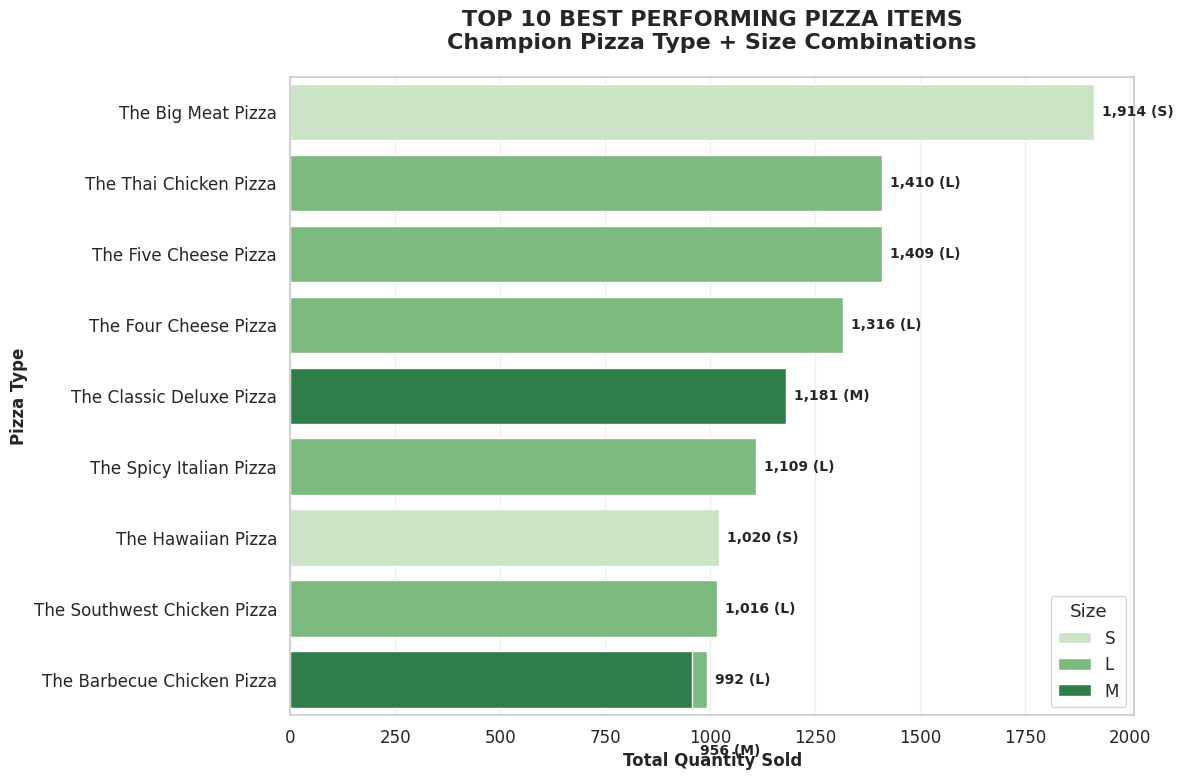


BUSINESS INSIGHTS: CHAMPION PIZZA COMBINATION ANALYSIS
PERFORMANCE OVERVIEW:
Total units sold across all combinations: 49,574
Top 10 combinations sold: 12,323 units
Market share of top 10 combinations: 24.9%
Average units per top performer: 1,232

TOP 10 PIZZA COMBINATIONS BY SALES:
   1. The Big Meat Pizza        S        1,914 units (3.9%)
   2. The Thai Chicken Pizza    L        1,410 units (2.8%)
   3. The Five Cheese Pizza     L        1,409 units (2.8%)
   4. The Four Cheese Pizza     L        1,316 units (2.7%)
   5. The Classic Deluxe Pizza  M        1,181 units (2.4%)
   6. The Spicy Italian Pizza   L        1,109 units (2.2%)
   7. The Hawaiian Pizza        S        1,020 units (2.1%)
   8. The Southwest Chicken Pizza L        1,016 units (2.0%)
   9. The Barbecue Chicken Pizza L          992 units (2.0%)
  10. The Barbecue Chicken Pizza M          956 units (1.9%)

SIZE DISTRIBUTION IN TOP PERFORMERS:
  L: 6 combinations (60% of top 10)
  S: 2 combinations (20% of top 10)
 

,name,size,quantity
3,The Big Meat Pizza,S,"1,914"
85,The Thai Chicken Pizza,L,"1,410"
20,The Five Cheese Pizza,L,"1,409"
21,The Four Cheese Pizza,L,"1,316"
18,The Classic Deluxe Pizza,M,"1,181"
73,The Spicy Italian Pizza,L,"1,109"
33,The Hawaiian Pizza,S,"1,020"
70,The Southwest Chicken Pizza,L,"1,016"
0,The Barbecue Chicken Pizza,L,992
1,The Barbecue Chicken Pizza,M,956


In [79]:
# =============================================
# IDENTIFY THE MOST POPULAR PIZZA COMBINATIONS
# =============================================

# Sort the pizza sales data from highest to lowest sales
strongest_pizzas = pizza_item_sales.sort_values(by="quantity", ascending=False).head(10)
# Step-by-step:
# 1. sort_values(by="quantity", ascending=False) - Sort from highest to lowest sales
# 2. head(10) - Take the top 10 best-selling pizza combinations
# 3. These are the pizza type + size combinations that customers love the most

# Calculate additional performance metrics
total_all_combinations_sold = pizza_item_sales['quantity'].sum()
strongest_total = strongest_pizzas['quantity'].sum()
strongest_percentage = (strongest_total / total_all_combinations_sold) * 100
avg_strong_performer = strongest_pizzas['quantity'].mean()

# =============================================
# CREATE CHART SHOWING MOST POPULAR COMBINATIONS
# =============================================

# Set up chart size
plt.figure(figsize=(12, 8))

# Create horizontal bar chart with success colors
bars = sns.barplot(data=strongest_pizzas, x="quantity", y="name", hue="size", dodge=False, palette="Greens")
# data=strongest_pizzas - Use our top 10 performers data
# x="quantity" - Sales numbers on x-axis (longer bars = more popular)
# y="name" - Pizza names on y-axis
# hue="size" - Color bars by pizza size (shows which sizes are most popular)
# dodge=False - All bars appear on same line for easy comparison
# palette="Greens" - Green color scheme (success colors for high performance)

# Add value labels on each bar
for i, (idx, row) in enumerate(strongest_pizzas.iterrows()):
    plt.text(row['quantity'] + (max(strongest_pizzas['quantity']) * 0.01),
             i, f"{row['quantity']:,} ({row['size']})",
             va='center', fontweight='bold', fontsize=10)

# Add chart titles and labels
plt.title("TOP 10 BEST PERFORMING PIZZA ITEMS\nChampion Pizza Type + Size Combinations",
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Total Quantity Sold", fontsize=12, fontweight='bold')
plt.ylabel("Pizza Type", fontsize=12, fontweight='bold')

plt.legend(title="Size", loc='lower right')
# Add legend to explain what each color represents (S, M, L, XL sizes)

# Add grid for better readability
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================
# BUSINESS INSIGHTS ANALYSIS
# =============================================

print("\n" + "="*75)
print("BUSINESS INSIGHTS: CHAMPION PIZZA COMBINATION ANALYSIS")
print("="*75)

print(f"PERFORMANCE OVERVIEW:")
print(f"Total units sold across all combinations: {total_all_combinations_sold:,}")
print(f"Top 10 combinations sold: {strongest_total:,} units")
print(f"Market share of top 10 combinations: {strongest_percentage:.1f}%")
print(f"Average units per top performer: {avg_strong_performer:,.0f}")

print(f"\nTOP 10 PIZZA COMBINATIONS BY SALES:")
for i, (_, combo) in enumerate(strongest_pizzas.iterrows(), 1):
    percentage = (combo['quantity'] / total_all_combinations_sold) * 100
    print(f"  {i:2}. {combo['name']:25} {combo['size']:8} {combo['quantity']:>5,} units ({percentage:.1f}%)")

# Analyze size distribution in top performers
size_distribution = strongest_pizzas['size'].value_counts()
print(f"\nSIZE DISTRIBUTION IN TOP PERFORMERS:")
for size, count in size_distribution.items():
    percentage = (count / len(strongest_pizzas)) * 100
    print(f"  {size}: {count} combinations ({percentage:.0f}% of top 10)")

# Identify champion patterns
print(f"\nCHAMPION PATTERNS IDENTIFIED:")

# Check if certain pizza types appear multiple times with different sizes
pizza_appearances = strongest_pizzas['name'].value_counts()
champion_pizzas = pizza_appearances[pizza_appearances > 1]

if not champion_pizzas.empty:
    print("  PIZZAS WITH MULTIPLE WINNING SIZES:")
    for pizza, count in champion_pizzas.items():
        sizes = strongest_pizzas[strongest_pizzas['name'] == pizza]['size'].tolist()
        total_sales = strongest_pizzas[strongest_pizzas['name'] == pizza]['quantity'].sum()
        print(f"    {pizza}: {', '.join(sizes)} - {total_sales:,} total units")
else:
    print("  No pizzas with multiple top-performing sizes")

# Calculate dominance metrics
champion_combo = strongest_pizzas.iloc[0]
runner_up_combo = strongest_pizzas.iloc[1] if len(strongest_pizzas) > 1 else None

print(f"\nCHAMPION ANALYSIS:")
print(f"Top performer: {champion_combo['name']} {champion_combo['size']}")
print(f"Units sold: {champion_combo['quantity']:,}")
if runner_up_combo is not None:
    performance_gap = champion_combo['quantity'] - runner_up_combo['quantity']
    gap_percentage = (performance_gap / champion_combo['quantity']) * 100
    print(f"Lead over #2: {performance_gap:,} units ({gap_percentage:.1f}% gap)")

# Revenue impact analysis
if 'price' in df.columns:
    # Merge with price data
    combo_prices = df.groupby(['name', 'size'])['price'].mean().reset_index()
    strongest_with_prices = strongest_pizzas.merge(combo_prices, on=['name', 'size'])

    total_strong_revenue = (strongest_with_prices['quantity'] * strongest_with_prices['price']).sum()
    avg_price_strong = strongest_with_prices['price'].mean()
    revenue_percentage = (total_strong_revenue / df['Revenue'].sum()) * 100

    print(f"\nREVENUE IMPACT ANALYSIS:")
    print(f"Estimated revenue from top 10 combinations: ${total_strong_revenue:,.2f}")
    print(f"Percentage of total revenue: {revenue_percentage:.1f}%")
    print(f"Average price of top combinations: ${avg_price_strong:.2f}")

# Compare with average performance
avg_all_combinations = pizza_item_sales['quantity'].mean()
performance_multiplier = avg_strong_performer / avg_all_combinations

print(f"\nPERFORMANCE BENCHMARKS:")
print(f"Average units per combination: {avg_all_combinations:.1f}")
print(f"Average units per top 10: {avg_strong_performer:.1f}")
print(f"Top performers outsell average by: {performance_multiplier:.1f}x")

print(f"\nSTRATEGIC RECOMMENDATIONS:")

# Size strategy recommendations
most_popular_size = size_distribution.index[0] if not size_distribution.empty else None
if most_popular_size:
    print(f"1. SIZE STRATEGY - Focus on {most_popular_size} size optimization")
    print(f"   Ensure consistent quality and availability for most popular size")

# Menu placement recommendations
if not champion_pizzas.empty:
    best_pizza = champion_pizzas.index[0]
    print(f"2. MENU PLACEMENT - Feature {best_pizza} prominently on menu")
    print(f"   Consider strategic positioning and visual highlighting")
else:
    top_pizza = strongest_pizzas.iloc[0]['name']
    print(f"2. STAR PERFORMER - Build marketing around {top_pizza}")
    print(f"   Create combo deals and featured promotions")

print("3. INVENTORY PRIORITIZATION:")
print("   Ensure ample stock of ingredients for top-performing combinations")
print("   Optimize preparation workflows for high-volume items")

print("4. STAFF TRAINING FOCUS:")
print("   Train staff to recommend and efficiently prepare top combinations")
print("   Ensure consistent quality for customer favorites")

print("5. MARKETING AMPLIFICATION:")
print("   Feature top combinations in advertising and promotions")
print("   Create bundle deals around proven winners")
print("   Use customer testimonials and popularity indicators")

# Growth opportunity analysis
print(f"\nGROWTH OPPORTUNITIES:")
if len(strongest_pizzas) > 1:
    # Identify similar patterns to top performers
    top_size_pattern = strongest_pizzas['size'].mode()[0]
    print(f"  Expand {top_size_pattern} size offerings for similar pizza types")

    # Cross-selling opportunities
    print(f"  Create combo deals pairing top performers with complementary items")

    # Premiumization opportunities
    avg_top_price = strongest_with_prices['price'].mean() if 'price' in df.columns else 0
    if avg_top_price < df['price'].quantile(0.75):
        print(f"  Consider premium versions of top combinations with price increase")

# Customer preference insights
print(f"\nCUSTOMER PREFERENCE INSIGHTS:")
print(f"  Preferred size: {most_popular_size}")
if not champion_pizzas.empty:
    print(f"  Most versatile pizza: {champion_pizzas.index[0]} (multiple popular sizes)")
print(f"  Clear customer favorite: {champion_combo['name']} {champion_combo['size']}")

# Display the detailed data table
print(f"\nDETAILED CHAMPION PERFORMANCE DATA:")
display(strongest_pizzas[['name', 'size', 'quantity']].style.format({
    'quantity': '{:,}'
}).background_gradient(subset=['quantity'], cmap='Greens'))

#Forecasting Top Pizza Over The Next Months

ANALYZING SALES FORECAST FOR: The Big Meat Pizza S
Historical sales: 1,914 units
Historical data period: 357 days
Average daily sales: 5.4 units
Peak daily sales: 15 units
Training forecasting model...
Generating sales predictions...


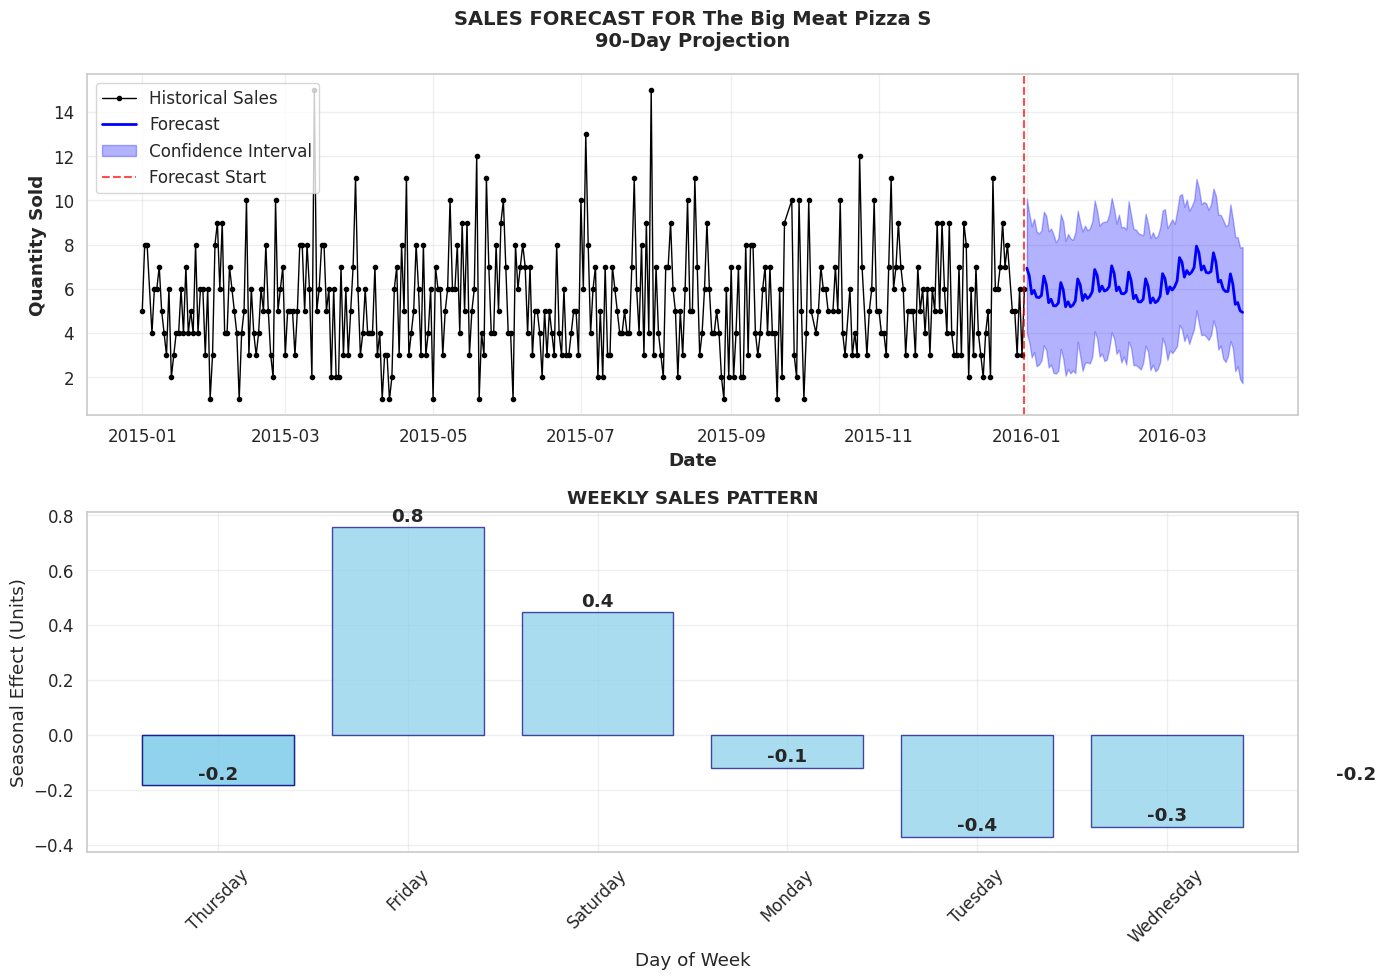


BUSINESS INSIGHTS: SALES FORECAST ANALYSIS
FORECAST SUMMARY (Next 90 Days):
Predicted average daily sales: 6.1 units
Predicted total sales: 549 units
Expected growth rate: +13.8%
Confidence range: 3.1 to 9.1 units per day

EXPECTED WEEKLY PATTERN (Average Daily Sales):
  Monday   : 6.0 units
  Tuesday  : 5.7 units
  Wednesday: 5.8 units
  Thursday : 6.0 units
  Friday   : 6.9 units
  Saturday : 6.6 units
  Sunday   : 5.8 units

PEAK PERFORMANCE FORECAST:
Best day: 2016-03-11 (Friday)
Expected sales: 7.9 units
Worst day: 2016-03-30 (Wednesday)
Expected sales: 4.9 units

MONTHLY FORECAST DISTRIBUTION:
  February : 173 units (31.5%)
  January  : 181 units (32.9%)
  March    : 195 units (35.6%)

FINANCIAL IMPACT ANALYSIS:
Average price per The Big Meat Pizza S: $12.00
Predicted 90-day revenue: $6,590.03

STRATEGIC RECOMMENDATIONS:
1. INVENTORY PLANNING:
   Base inventory: 6.1 units daily
   Peak day preparation: 7.9 units
2. STAFFING: Plan for +13.8% growth - consider additional staff
3. 

In [80]:

# =============================================
# REDUCE ANNOYING SYSTEM MESSAGES
# =============================================

# Turn off unnecessary warning messages from the forecasting tools
logging.getLogger("prophet").setLevel(logging.WARNING)
logging.getLogger("cmdstanpy").setLevel(logging.WARNING)
# This keeps our output clean and focused on the important results

# =============================================
# IDENTIFY THE #1 BEST-SELLING PIZZA
# =============================================

# Get the absolute top-selling pizza combination (name + size)
top_item = strongest_pizzas.iloc[0]["name"] + " " + strongest_pizzas.iloc[0]["size"]
# iloc[0] gets the first row (the highest seller from our previous analysis)
# Example result: "Pepperoni Large" or "Cheese Medium"

print(f"ANALYZING SALES FORECAST FOR: {top_item}")
print(f"Historical sales: {strongest_pizzas.iloc[0]['quantity']:,} units")

# =============================================
# PREPARE DATA FOR THE TOP PIZZA
# =============================================

# Create a combined column that identifies each pizza by name AND size
df["pizza_item"] = df["name"].astype(str) + " " + df["size"]
# This creates entries like "Pepperoni Large", "Cheese Medium", etc.

# Filter the data to get only sales for our top pizza item
top_item_sales = df[df["pizza_item"] == top_item].groupby("date")["quantity"].sum().reset_index()
# Step-by-step:
# 1. df[df["pizza_item"] == top_item] - Keep only rows for our top pizza
# 2. groupby("date")["quantity"].sum() - Add up daily sales
# 3. reset_index() - Convert to regular table format

# Check if we have sufficient data for forecasting
if len(top_item_sales) < 30:
    print(f"WARNING: Only {len(top_item_sales)} days of historical data available.")
    print("Forecast may be less accurate with limited historical data.")

# Calculate historical performance metrics
historical_avg_daily = top_item_sales['quantity'].mean()
historical_max_daily = top_item_sales['quantity'].max()
historical_min_daily = top_item_sales['quantity'].min()
data_days = len(top_item_sales)

print(f"Historical data period: {data_days} days")
print(f"Average daily sales: {historical_avg_daily:.1f} units")
print(f"Peak daily sales: {historical_max_daily} units")

# Ensure date column is proper datetime format
top_item_sales['date'] = pd.to_datetime(top_item_sales['date'], errors='coerce')

# Remove any rows with invalid dates
top_item_sales = top_item_sales.dropna(subset=['date'])

# Rename columns to match what the forecasting tool expects
top_item_sales = top_item_sales.rename(columns={"date": "ds", "quantity": "y"})
# Prophet requires: 'ds' for dates and 'y' for values we want to predict

# =============================================
# SET UP THE PREDICTION MODEL
# =============================================

# Create the forecasting model with seasonal patterns
model = Prophet(
    yearly_seasonality=True,   # Capture yearly patterns (holidays, seasons)
    weekly_seasonality=10,     # Capture weekly patterns (weekend vs weekday)
    # Higher number (10) means pay more attention to weekly patterns
    daily_seasonality=False,   # Turn off daily seasonality for daily data
    interval_width=0.80        # 80% confidence interval for predictions (more realistic)
)

# Train the model with our historical sales data
print("Training forecasting model...")
model.fit(top_item_sales)
# The model learns patterns from past sales to predict future sales

# =============================================
# MAKE FUTURE PREDICTIONS
# =============================================

# Create a timeline that extends 90 days into the future
future = model.make_future_dataframe(periods=90)
# This adds 90 new days to the end of our historical data

# Generate predictions for the future dates
print("Generating sales predictions...")
forecast = model.predict(future)
# The model predicts how many pizzas we'll sell each day for the next 90 days

# =============================================
# CREATE ENHANCED VISUALIZATIONS (ERROR-FREE)
# =============================================

# Create custom visualization instead of using Prophet's built-in plot
plt.figure(figsize=(14, 10))

# Plot 1: Historical vs Forecast
plt.subplot(2, 1, 1)

# Plot historical data
plt.plot(top_item_sales['ds'], top_item_sales['y'],
         'ko-', markersize=3, linewidth=1, label='Historical Sales')

# Plot forecast
forecast_start = top_item_sales['ds'].max()
future_forecast = forecast[forecast['ds'] > forecast_start]

plt.plot(future_forecast['ds'], future_forecast['yhat'],
         'b-', linewidth=2, label='Forecast')
plt.fill_between(future_forecast['ds'],
                 future_forecast['yhat_lower'],
                 future_forecast['yhat_upper'],
                 alpha=0.3, color='blue', label='Confidence Interval')

plt.axvline(x=forecast_start, color='red', linestyle='--',
            alpha=0.7, label='Forecast Start')
plt.title(f'SALES FORECAST FOR {top_item}\n90-Day Projection',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Quantity Sold', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Weekly Seasonality
plt.subplot(2, 1, 2)

# Extract weekly seasonality
if 'weekly' in forecast.columns:
    # Get one week of data for weekly pattern
    weekly_data = forecast[['ds', 'weekly']].head(7).copy()
    weekly_data['day'] = weekly_data['ds'].dt.day_name()

    plt.bar(weekly_data['day'], weekly_data['weekly'],
            color='skyblue', edgecolor='navy', alpha=0.7)
    plt.title('WEEKLY SALES PATTERN', fontweight='bold')
    plt.xlabel('Day of Week')
    plt.ylabel('Seasonal Effect (Units)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # Add value labels on bars
    for i, value in enumerate(weekly_data['weekly']):
        plt.text(i, value + (max(weekly_data['weekly']) * 0.01),
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# =============================================
# BUSINESS INSIGHTS ANALYSIS
# =============================================

print("\n" + "="*70)
print("BUSINESS INSIGHTS: SALES FORECAST ANALYSIS")
print("="*70)

# Extract forecast results
future_forecast = forecast[forecast['ds'] > forecast_start].copy()
forecast_days = len(future_forecast)

# Calculate forecast metrics
predicted_avg_daily = future_forecast['yhat'].mean()
predicted_total = future_forecast['yhat'].sum()
confidence_upper = future_forecast['yhat_upper'].mean()
confidence_lower = future_forecast['yhat_lower'].mean()

# Calculate growth/decline
growth_rate = ((predicted_avg_daily - historical_avg_daily) / historical_avg_daily) * 100

print(f"FORECAST SUMMARY (Next 90 Days):")
print(f"Predicted average daily sales: {predicted_avg_daily:.1f} units")
print(f"Predicted total sales: {predicted_total:.0f} units")
print(f"Expected growth rate: {growth_rate:+.1f}%")
print(f"Confidence range: {confidence_lower:.1f} to {confidence_upper:.1f} units per day")

# Analyze weekly patterns
future_forecast['day_of_week'] = future_forecast['ds'].dt.day_name()
weekly_forecast = future_forecast.groupby('day_of_week')['yhat'].mean()

# Reorder days properly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_forecast = weekly_forecast.reindex(day_order)

print(f"\nEXPECTED WEEKLY PATTERN (Average Daily Sales):")
for day in day_order:
    if day in weekly_forecast.index:
        sales = weekly_forecast[day]
        print(f"  {day:9}: {sales:.1f} units")

# Identify best and worst forecast days
if not future_forecast.empty:
    best_forecast_day = future_forecast.loc[future_forecast['yhat'].idxmax()]
    worst_forecast_day = future_forecast.loc[future_forecast['yhat'].idxmin()]

    print(f"\nPEAK PERFORMANCE FORECAST:")
    print(f"Best day: {best_forecast_day['ds'].strftime('%Y-%m-%d')} ({best_forecast_day['ds'].strftime('%A')})")
    print(f"Expected sales: {best_forecast_day['yhat']:.1f} units")
    print(f"Worst day: {worst_forecast_day['ds'].strftime('%Y-%m-%d')} ({worst_forecast_day['ds'].strftime('%A')})")
    print(f"Expected sales: {worst_forecast_day['yhat']:.1f} units")

# Monthly analysis
future_forecast['month'] = future_forecast['ds'].dt.month_name()
monthly_forecast = future_forecast.groupby('month')['yhat'].sum()

print(f"\nMONTHLY FORECAST DISTRIBUTION:")
for month, sales in monthly_forecast.items():
    percentage = (sales / predicted_total) * 100
    print(f"  {month:9}: {sales:.0f} units ({percentage:.1f}%)")

# Business impact analysis
if 'price' in df.columns:
    pizza_price = df[df['pizza_item'] == top_item]['price'].mean()
    predicted_revenue = predicted_total * pizza_price

    print(f"\nFINANCIAL IMPACT ANALYSIS:")
    print(f"Average price per {top_item}: ${pizza_price:.2f}")
    print(f"Predicted 90-day revenue: ${predicted_revenue:,.2f}")

print(f"\nSTRATEGIC RECOMMENDATIONS:")

# Inventory planning
print(f"1. INVENTORY PLANNING:")
print(f"   Base inventory: {predicted_avg_daily:.1f} units daily")
print(f"   Peak day preparation: {best_forecast_day['yhat']:.1f} units")

# Staffing recommendations
if growth_rate > 10:
    print(f"2. STAFFING: Plan for {growth_rate:+.1f}% growth - consider additional staff")
elif growth_rate < -5:
    print(f"2. STAFFING: Prepare for {growth_rate:+.1f}% decline - adjust schedules")
else:
    print(f"2. STAFFING: Maintain current staffing levels")

# Identify slowest day for promotions
slowest_day = weekly_forecast.idxmin()
print(f"3. MARKETING: Target promotions on {slowest_day}s to boost sales")

# Risk assessment
volatility = (confidence_upper - confidence_lower) / predicted_avg_daily
if volatility > 0.4:
    print(f"4. RISK: High demand variability - maintain flexible inventory")
else:
    print(f"4. RISK: Stable demand pattern expected")

# =============================================
# DETAILED FORECAST DATA
# =============================================

print(f"\nSAMPLE FORECAST DATA (Next 7 Days):")
sample_forecast = future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(7).copy()
sample_forecast['Date'] = sample_forecast['ds'].dt.strftime('%m/%d')
sample_forecast['Day'] = sample_forecast['ds'].dt.day_name()
sample_display = sample_forecast[['Date', 'Day', 'yhat', 'yhat_lower', 'yhat_upper']]
sample_display.columns = ['Date', 'Day', 'Predicted', 'Lower Bound', 'Upper Bound']

print(sample_display.to_string(index=False, float_format='%.1f'))

print(f"\nForecast completed successfully for {top_item}!")

## Pizza Toppings Analysis

We now analyze **pizza toppings** (ingredients) to see which ones are most common, which drive sales, and how they trend over time.

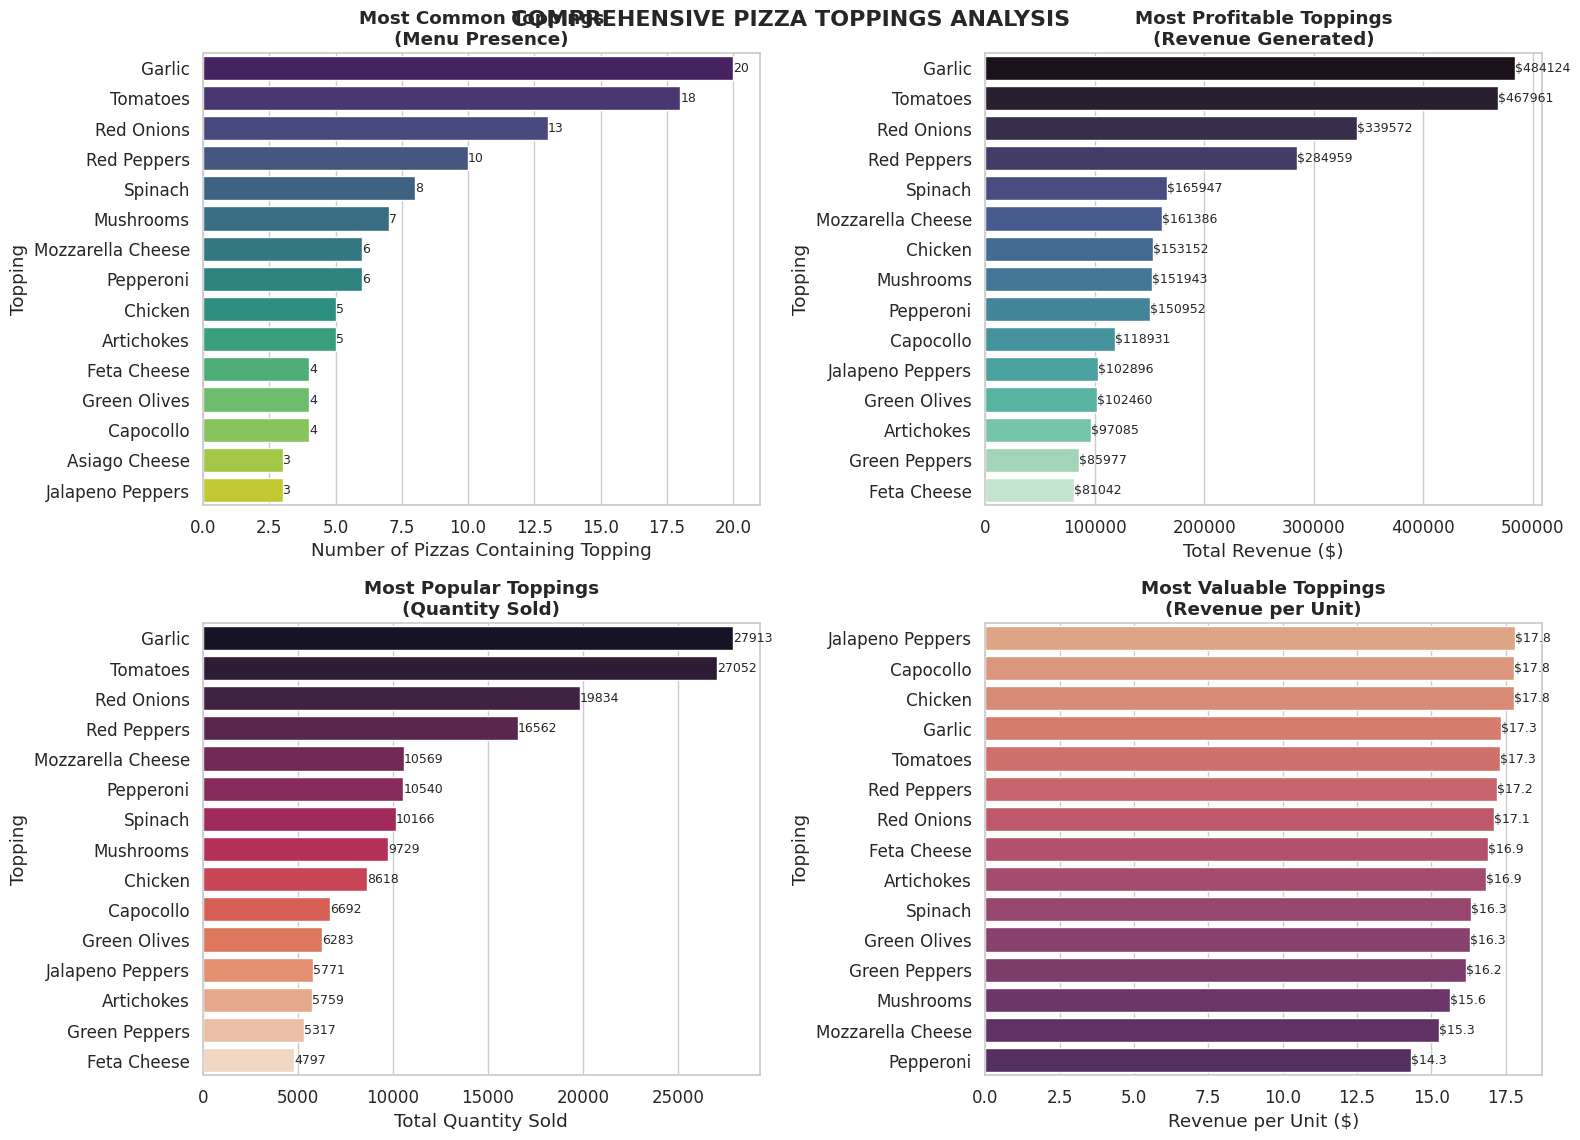


BUSINESS INSIGHTS: PIZZA TOPPINGS STRATEGIC ANALYSIS
OVERVIEW METRICS:
Total revenue from all toppings: $2,948,385.80
Unique toppings used: 65
Total pizza-topping combinations: 181

CHAMPION TOPPINGS ANALYSIS:
Highest Revenue: Garlic - $484,124.30
Highest Quantity: Garlic - 27,913 units
Most Efficient: Jalapeno Peppers - $17.83 per unit

MENU PRESENCE vs REVENUE CORRELATION: 0.986
  Strong correlation - popular menu toppings drive revenue

TOPPING CATEGORIZATION:
Premium Toppings (High Value): Jalapeno Peppers, Capocollo, Chicken, Garlic
Volume Toppings (High Quantity): 

STRATEGIC RECOMMENDATIONS:
1. INVENTORY PRIORITIZATION:
   Stock heavily: Garlic (high volume)
   Protect quality: Garlic (high revenue impact)
   Monitor waste: Low-efficiency toppings
2. MENU DEVELOPMENT:
   Feature Garlic in new pizza creations
   Create premium pizzas using: Jalapeno Peppers, Capocollo, Chicken
3. PRICING STRATEGY:
   Consider premium pricing for high-value toppings
   Use volume toppings for val

In [81]:
# =============================================
# ANALYZE PIZZA TOPPINGS PATTERNS
# =============================================

# --- Extract toppings from pizza types ---

# Create a copy of the pizza types data to work with
pizza_toppings = pizza_types.copy()

# Split the ingredients string into a list of individual toppings
# Example: "Cheese, Pepperoni, Mushrooms" becomes ["Cheese", "Pepperoni", "Mushrooms"]
pizza_toppings['topping_list'] = pizza_toppings['ingredients'].str.split(", ")

# Explode the list so each topping gets its own row
topping_exploded = pizza_toppings.explode('topping_list')
# Before: 1 row with ["Cheese", "Pepperoni", "Mushrooms"]
# After: 3 rows - "Cheese", "Pepperoni", "Mushrooms" (all with same pizza type)

# Clean up topping names (remove extra spaces and standardize)
topping_exploded['topping_list'] = topping_exploded['topping_list'].str.strip()

# Merge toppings with sales data to see which toppings make the most money
df_toppings_exploded = df.merge(
    topping_exploded[['pizza_type_id','topping_list']],
    on='pizza_type_id', how='left'
)
# This connects each pizza sale with all its toppings
# Now we can track how much money each topping generates

# =============================================
# COMPREHENSIVE TOPPINGS ANALYSIS
# =============================================

# Create subplots for comprehensive analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('COMPREHENSIVE PIZZA TOPPINGS ANALYSIS', fontsize=16, fontweight='bold', y=0.95)

# =============================================
# ANALYSIS 1: MOST COMMON TOPPINGS ON MENU
# =============================================

# Count how many different pizzas contain each topping
top_toppings = topping_exploded['topping_list'].value_counts().head(15).reset_index()
# Step-by-step:
# 1. value_counts() - Count how many times each topping appears
# 2. head(15) - Take the top 15 most common toppings
# 3. reset_index() - Convert to regular table format
top_toppings.columns = ['Topping', 'Count']  # Rename columns for clarity

# Chart 1: Most Common Toppings (Menu Presence)
sns.barplot(data=top_toppings, x='Count', y='Topping', ax=axes[0,0], palette="viridis")
axes[0,0].set_title("Most Common Toppings\n(Menu Presence)", fontweight='bold')
axes[0,0].set_xlabel("Number of Pizzas Containing Topping")
axes[0,0].set_ylabel("Topping")

# Add value labels on bars
for container in axes[0,0].containers:
    axes[0,0].bar_label(container, fmt='%.0f', fontsize=9)

# =============================================
# ANALYSIS 2: TOPPINGS THAT MAKE THE MOST MONEY
# =============================================

# Calculate total revenue generated by each topping
topping_sales = df_toppings_exploded.groupby('topping_list')['Revenue'].sum().sort_values(ascending=False).head(15).reset_index()
# Step-by-step:
# 1. groupby('topping_list') - Group by each topping
# 2. ['Revenue'].sum() - Add up all money made from pizzas with that topping
# 3. sort_values(ascending=False) - Sort from highest to lowest revenue
# 4. head(15) - Take the top 15 money-making toppings
topping_sales.columns = ['Topping', 'Revenue']  # Rename columns

# Chart 2: Most Profitable Toppings
sns.barplot(data=topping_sales, x='Revenue', y='Topping', ax=axes[0,1], palette="mako")
axes[0,1].set_title("Most Profitable Toppings\n(Revenue Generated)", fontweight='bold')
axes[0,1].set_xlabel("Total Revenue ($)")
axes[0,1].set_ylabel("Topping")

# Add value labels on bars (formatted as dollars)
for container in axes[0,1].containers:
    axes[0,1].bar_label(container, fmt='$%.0f', fontsize=9)

# =============================================
# ANALYSIS 3: TOPPINGS BY QUANTITY SOLD
# =============================================

# Calculate total quantity sold for each topping
topping_quantity = df_toppings_exploded.groupby('topping_list')['quantity'].sum().sort_values(ascending=False).head(15).reset_index()
topping_quantity.columns = ['Topping', 'Quantity']

# Chart 3: Most Popular Toppings (Quantity)
sns.barplot(data=topping_quantity, x='Quantity', y='Topping', ax=axes[1,0], palette="rocket")
axes[1,0].set_title("Most Popular Toppings\n(Quantity Sold)", fontweight='bold')
axes[1,0].set_xlabel("Total Quantity Sold")
axes[1,0].set_ylabel("Topping")

# Add value labels on bars
for container in axes[1,0].containers:
    axes[1,0].bar_label(container, fmt='%.0f', fontsize=9)

# =============================================
# ANALYSIS 4: REVENUE PER UNIT ANALYSIS
# =============================================

# Calculate revenue per unit for each topping
topping_efficiency = topping_sales.merge(topping_quantity, on='Topping')
topping_efficiency['Revenue_Per_Unit'] = topping_efficiency['Revenue'] / topping_efficiency['Quantity']
topping_efficiency = topping_efficiency.sort_values('Revenue_Per_Unit', ascending=False).head(15)

# Chart 4: Most Valuable Toppings (Revenue per Unit)
sns.barplot(data=topping_efficiency, x='Revenue_Per_Unit', y='Topping', ax=axes[1,1], palette="flare")
axes[1,1].set_title("Most Valuable Toppings\n(Revenue per Unit)", fontweight='bold')
axes[1,1].set_xlabel("Revenue per Unit ($)")
axes[1,1].set_ylabel("Topping")

# Add value labels on bars
for container in axes[1,1].containers:
    axes[1,1].bar_label(container, fmt='$%.1f', fontsize=9)

plt.tight_layout()
plt.show()

# =============================================
# BUSINESS INSIGHTS ANALYSIS
# =============================================

print("\n" + "="*80)
print("BUSINESS INSIGHTS: PIZZA TOPPINGS STRATEGIC ANALYSIS")
print("="*80)

# Calculate overall metrics
total_toppings_revenue = topping_sales['Revenue'].sum()
total_pizzas_with_toppings = len(topping_exploded)
unique_toppings = topping_exploded['topping_list'].nunique()

print(f"OVERVIEW METRICS:")
print(f"Total revenue from all toppings: ${total_toppings_revenue:,.2f}")
print(f"Unique toppings used: {unique_toppings}")
print(f"Total pizza-topping combinations: {total_pizzas_with_toppings}")

# Identify champion toppings
champion_revenue = topping_sales.iloc[0]
champion_quantity = topping_quantity.iloc[0]
champion_efficiency = topping_efficiency.iloc[0]

print(f"\nCHAMPION TOPPINGS ANALYSIS:")
print(f"Highest Revenue: {champion_revenue['Topping']} - ${champion_revenue['Revenue']:,.2f}")
print(f"Highest Quantity: {champion_quantity['Topping']} - {champion_quantity['Quantity']:,} units")
print(f"Most Efficient: {champion_efficiency['Topping']} - ${champion_efficiency['Revenue_Per_Unit']:.2f} per unit")

# Analyze menu presence vs revenue correlation
menu_vs_revenue = top_toppings.merge(topping_sales, on='Topping', how='inner')
if not menu_vs_revenue.empty:
    correlation = menu_vs_revenue['Count'].corr(menu_vs_revenue['Revenue'])
    print(f"\nMENU PRESENCE vs REVENUE CORRELATION: {correlation:.3f}")

    if correlation > 0.7:
        print("  Strong correlation - popular menu toppings drive revenue")
    elif correlation > 0.3:
        print("  Moderate correlation - some relationship exists")
    else:
        print("  Weak correlation - menu presence doesn't guarantee revenue")

# Identify premium vs volume toppings
print(f"\nTOPPING CATEGORIZATION:")

# Premium toppings (high revenue per unit)
premium_toppings = topping_efficiency[topping_efficiency['Revenue_Per_Unit'] > topping_efficiency['Revenue_Per_Unit'].quantile(0.75)]
print(f"Premium Toppings (High Value): {', '.join(premium_toppings['Topping'].head(5).tolist())}")

# Volume toppings (high quantity but lower price point)
volume_toppings = topping_quantity[topping_quantity['Quantity'] > topping_quantity['Quantity'].quantile(0.75)]
volume_toppings = volume_toppings.merge(topping_efficiency, on='Topping')
volume_toppings = volume_toppings[volume_toppings['Revenue_Per_Unit'] < topping_efficiency['Revenue_Per_Unit'].median()]
print(f"Volume Toppings (High Quantity): {', '.join(volume_toppings['Topping'].head(5).tolist())}")

# Underutilized toppings (low menu presence but high value)
menu_presence = topping_exploded['topping_list'].value_counts().reset_index()
menu_presence.columns = ['Topping', 'Menu_Count']
underutilized = menu_presence.merge(topping_efficiency, on='Topping')
underutilized = underutilized[underutilized['Menu_Count'] < menu_presence['Menu_Count'].quantile(0.25)]
underutilized = underutilized.nlargest(3, 'Revenue_Per_Unit')

if not underutilized.empty:
    print(f"Underutilized Gems: {', '.join(underutilized['Topping'].tolist())}")

print(f"\nSTRATEGIC RECOMMENDATIONS:")

# Inventory management
print(f"1. INVENTORY PRIORITIZATION:")
print(f"   Stock heavily: {champion_quantity['Topping']} (high volume)")
print(f"   Protect quality: {champion_revenue['Topping']} (high revenue impact)")
print(f"   Monitor waste: Low-efficiency toppings")

# Menu development
print(f"2. MENU DEVELOPMENT:")
print(f"   Feature {champion_revenue['Topping']} in new pizza creations")
print(f"   Create premium pizzas using: {', '.join(premium_toppings['Topping'].head(3).tolist())}")
if not underutilized.empty:
    print(f"   Test expanding use of: {underutilized['Topping'].iloc[0]}")

# Pricing strategy
print(f"3. PRICING STRATEGY:")
print(f"   Consider premium pricing for high-value toppings")
print(f"   Use volume toppings for value deals and promotions")

# Supplier management
print(f"4. SUPPLIER MANAGEMENT:")
print(f"   Build strong relationships with suppliers of: {champion_quantity['Topping']}")
print(f"   Seek premium suppliers for: {champion_efficiency['Topping']}")

# Marketing opportunities
print(f"5. MARKETING OPPORTUNITIES:")
print(f"   Highlight popularity of {champion_quantity['Topping']} in advertising")
print(f"   Create signature pizzas around top revenue generators")

# =============================================
# DETAILED PERFORMANCE DATA
# =============================================

print(f"\nTOP 10 TOPPINGS - COMPREHENSIVE PERFORMANCE:")
top_performers = topping_sales.merge(topping_quantity, on='Topping').merge(topping_efficiency[['Topping', 'Revenue_Per_Unit']], on='Topping')
top_performers = top_performers.head(10).copy()

# Calculate percentages for context
top_performers['Revenue_Percentage'] = (top_performers['Revenue'] / total_toppings_revenue) * 100
top_performers['Quantity_Percentage'] = (top_performers['Quantity'] / topping_quantity['Quantity'].sum()) * 100

for i, (_, topping) in enumerate(top_performers.iterrows(), 1):
    print(f"  {i:2}. {topping['Topping']:20} "
          f"Revenue: ${topping['Revenue']:>8,.0f} ({topping['Revenue_Percentage']:4.1f}%) | "
          f"Qty: {topping['Quantity']:>5,} | "
          f"Value: ${topping['Revenue_Per_Unit']:>5.2f}/unit")

# Performance gap analysis
if len(top_performers) > 1:
    revenue_gap = top_performers.iloc[0]['Revenue'] - top_performers.iloc[1]['Revenue']
    print(f"\nPERFORMANCE GAP ANALYSIS:")
    print(f"  Revenue gap between #1 and #2: ${revenue_gap:,.0f}")
    print(f"  Opportunity: Closing 50% of gap = ${revenue_gap * 0.5:,.0f} additional revenue")

##Forecasting Top Toppings (Seaborn Lineplot)

ANALYZING TRENDS FOR TOP 3 TOPPINGS: Garlic, Tomatoes, Red Onions


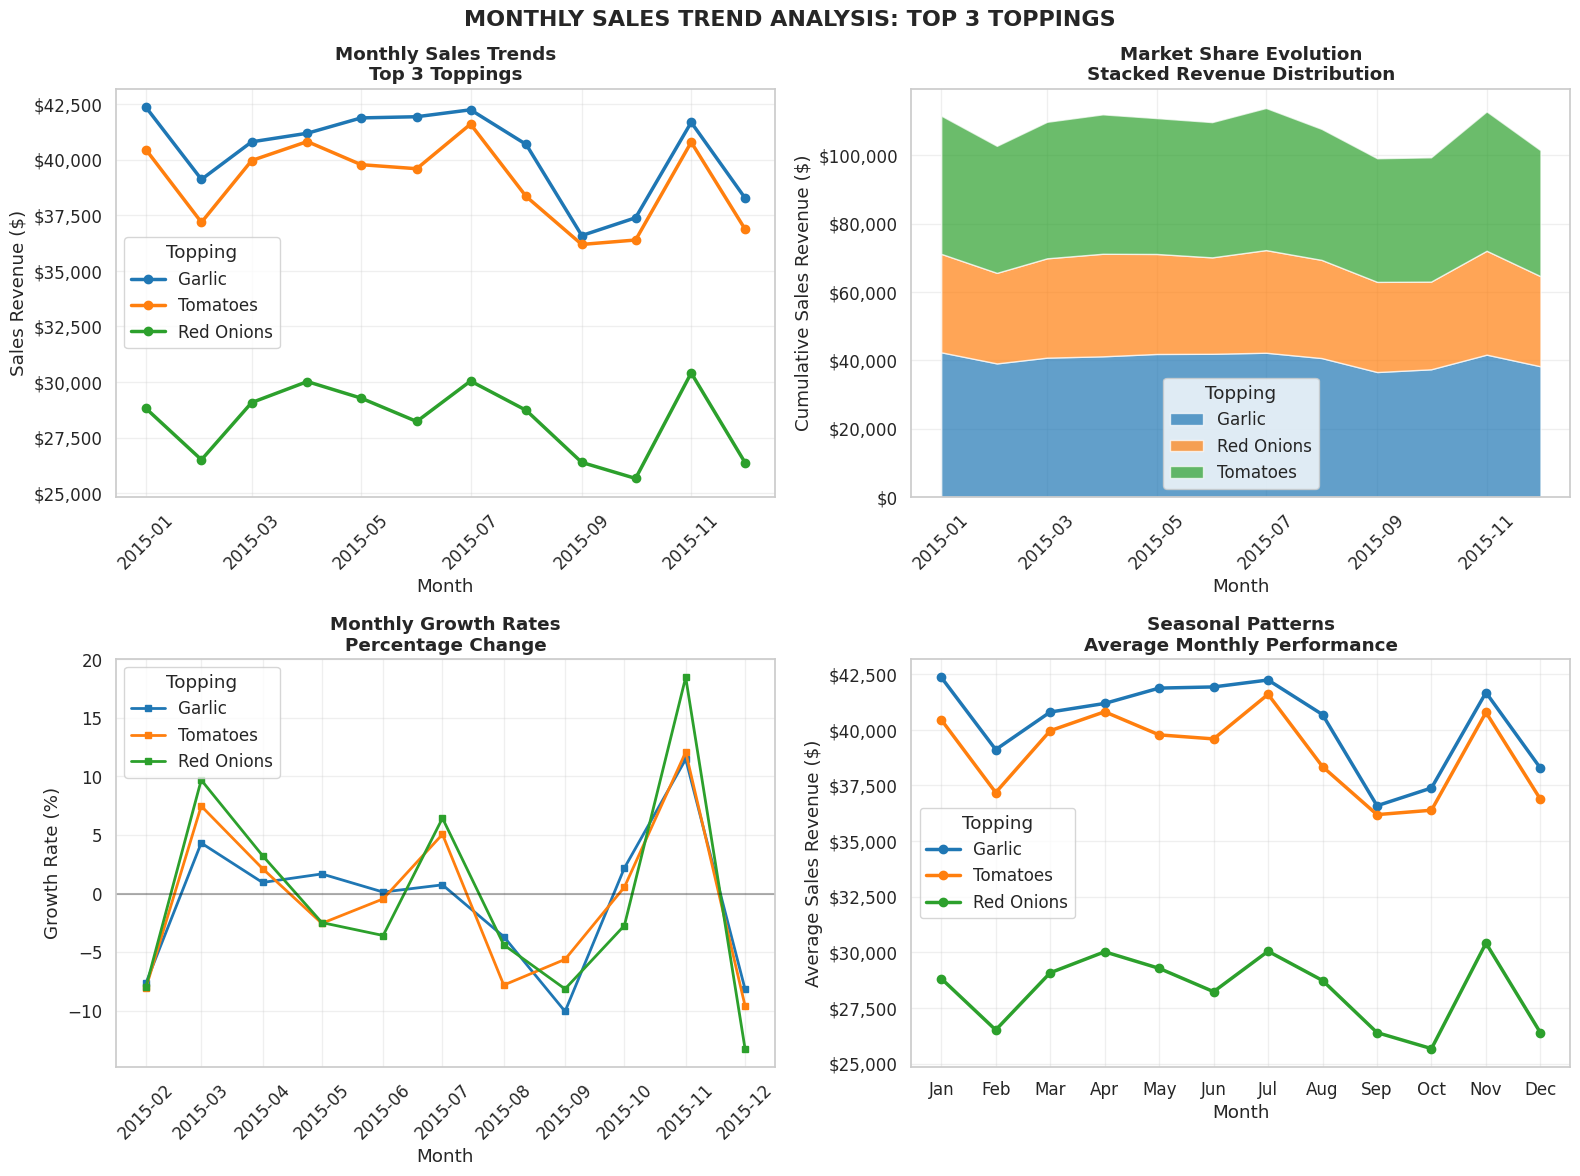


BUSINESS INSIGHTS: TOPPING TREND ANALYSIS

TREND PERFORMANCE ANALYSIS:
Topping              Total Revenue Avg Monthly  Growth   Volatility Consistency 
--------------------------------------------------------------------------------
Garlic               $   484,124 $    40,344    -9.6%       5.0%       63.6%
Tomatoes             $   467,961 $    38,997    -8.8%       4.9%       45.5%
Red Onions           $   339,572 $    28,298    -8.5%       5.8%       36.4%

KEY TREND PATTERNS:
Fastest Growing: Red Onions (-8.5% overall growth)
Most Stable: Tomatoes (4.9% volatility)
Most Consistent: Garlic (63.6% positive months)

SEASONAL PATTERN INSIGHTS:
Garlic: Peak in Jan 2015 ($42,362)
Tomatoes: Peak in Jul 2015 ($41,598)
Red Onions: Peak in Nov 2015 ($30,412)

CURRENT MARKET SHARE (Latest Month):
  Garlic: 37.7% ($38,276)
  Red Onions: 26.0% ($26,382)
  Tomatoes: 36.3% ($36,877)

STRATEGIC RECOMMENDATIONS:
1. GROWTH STRATEGY: Focus on revitalizing slower-growing toppings
   Develop promotion

In [82]:
# =============================================
# ANALYZE MONTHLY TOPPING SALES TRENDS
# =============================================

# Prepare monthly sales per topping
monthly_topping_sales = df_toppings_exploded.groupby([df_toppings_exploded['OrderDate'].dt.to_period("M"), 'topping_list'])['Revenue'].sum().reset_index()
monthly_topping_sales['OrderDate'] = monthly_topping_sales['OrderDate'].dt.to_timestamp()

# Pick top 3 toppings by total sales for trend analysis
top3_toppings = topping_sales['Topping'].head(3).tolist()

print(f"ANALYZING TRENDS FOR TOP 3 TOPPINGS: {', '.join(top3_toppings)}")

# =============================================
# CREATE COMPREHENSIVE TREND VISUALIZATION
# =============================================

# Create subplots for detailed trend analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('MONTHLY SALES TREND ANALYSIS: TOP 3 TOPPINGS', fontsize=16, fontweight='bold', y=0.98)

# Filter data for top 3 toppings
top3_data = monthly_topping_sales[monthly_topping_sales['topping_list'].isin(top3_toppings)]

# Chart 1: Line Plot - Monthly Sales Trends
for topping in top3_toppings:
    topping_data = top3_data[top3_data['topping_list'] == topping]
    axes[0,0].plot(topping_data['OrderDate'], topping_data['Revenue'],
                   marker='o', linewidth=2.5, markersize=6, label=topping)

axes[0,0].set_title("Monthly Sales Trends\nTop 3 Toppings", fontweight='bold')
axes[0,0].set_xlabel("Month")
axes[0,0].set_ylabel("Sales Revenue ($)")
axes[0,0].legend(title="Topping")
axes[0,0].grid(True, alpha=0.3)
axes[0,0].tick_params(axis='x', rotation=45)

# Format y-axis as currency
axes[0,0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Chart 2: Stacked Area Chart - Market Share Over Time
# Pivot data for stacked area chart
pivot_data = top3_data.pivot(index='OrderDate', columns='topping_list', values='Revenue').fillna(0)

axes[0,1].stackplot(pivot_data.index, pivot_data.T, labels=pivot_data.columns, alpha=0.7)
axes[0,1].set_title("Market Share Evolution\nStacked Revenue Distribution", fontweight='bold')
axes[0,1].set_xlabel("Month")
axes[0,1].set_ylabel("Cumulative Sales Revenue ($)")
axes[0,1].legend(title="Topping")
axes[0,1].grid(True, alpha=0.3)
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Chart 3: Growth Rate Analysis
growth_data = top3_data.copy()
growth_data = growth_data.sort_values(['topping_list', 'OrderDate'])
growth_data['growth_rate'] = growth_data.groupby('topping_list')['Revenue'].pct_change() * 100

for topping in top3_toppings:
    topping_growth = growth_data[growth_data['topping_list'] == topping]
    axes[1,0].plot(topping_growth['OrderDate'], topping_growth['growth_rate'],
                   marker='s', linewidth=2, markersize=4, label=topping)

axes[1,0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1,0].set_title("Monthly Growth Rates\nPercentage Change", fontweight='bold')
axes[1,0].set_xlabel("Month")
axes[1,0].set_ylabel("Growth Rate (%)")
axes[1,0].legend(title="Topping")
axes[1,0].grid(True, alpha=0.3)
axes[1,0].tick_params(axis='x', rotation=45)

# Chart 4: Seasonal Pattern Analysis
top3_data['month'] = top3_data['OrderDate'].dt.month
monthly_avg = top3_data.groupby(['topping_list', 'month'])['Revenue'].mean().reset_index()

for topping in top3_toppings:
    monthly_topping_avg = monthly_avg[monthly_avg['topping_list'] == topping]
    axes[1,1].plot(monthly_topping_avg['month'], monthly_topping_avg['Revenue'],
                   marker='o', linewidth=2.5, markersize=6, label=topping)

axes[1,1].set_title("Seasonal Patterns\nAverage Monthly Performance", fontweight='bold')
axes[1,1].set_xlabel("Month")
axes[1,1].set_ylabel("Average Sales Revenue ($)")
axes[1,1].set_xticks(range(1, 13))
axes[1,1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1,1].legend(title="Topping")
axes[1,1].grid(True, alpha=0.3)
axes[1,1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

# =============================================
# BUSINESS INSIGHTS ANALYSIS
# =============================================

print("\n" + "="*80)
print("BUSINESS INSIGHTS: TOPPING TREND ANALYSIS")
print("="*80)

# Calculate comprehensive trend metrics
trend_metrics = []

for topping in top3_toppings:
    topping_data = top3_data[top3_data['topping_list'] == topping].sort_values('OrderDate')

    if len(topping_data) > 1:
        # Basic metrics
        total_revenue = topping_data['Revenue'].sum()
        avg_monthly = topping_data['Revenue'].mean()
        peak_month = topping_data.loc[topping_data['Revenue'].idxmax()]
        lowest_month = topping_data.loc[topping_data['Revenue'].idxmin()]

        # Trend analysis
        first_month = topping_data.iloc[0]['Revenue']
        last_month = topping_data.iloc[-1]['Revenue']
        overall_growth = ((last_month - first_month) / first_month) * 100

        # Volatility analysis
        monthly_std = topping_data['Revenue'].std()
        coefficient_variation = (monthly_std / avg_monthly) * 100

        # Growth consistency
        positive_months = (topping_data['Revenue'].pct_change() > 0).sum()
        total_months = len(topping_data) - 1
        growth_consistency = (positive_months / total_months) * 100 if total_months > 0 else 0

        trend_metrics.append({
            'Topping': topping,
            'Total_Revenue': total_revenue,
            'Avg_Monthly': avg_monthly,
            'Overall_Growth': overall_growth,
            'Peak_Month': peak_month['OrderDate'].strftime('%b %Y'),
            'Peak_Revenue': peak_month['Revenue'],
            'Lowest_Month': lowest_month['OrderDate'].strftime('%b %Y'),
            'Lowest_Revenue': lowest_month['Revenue'],
            'Volatility': coefficient_variation,
            'Growth_Consistency': growth_consistency
        })

# Display trend analysis
print(f"\nTREND PERFORMANCE ANALYSIS:")
print(f"{'Topping':<20} {'Total Revenue':<12} {'Avg Monthly':<12} {'Growth':<8} {'Volatility':<10} {'Consistency':<12}")
print("-" * 80)

for metric in trend_metrics:
    print(f"{metric['Topping']:<20} ${metric['Total_Revenue']:>10,.0f} ${metric['Avg_Monthly']:>10,.0f} "
          f"{metric['Overall_Growth']:>7.1f}% {metric['Volatility']:>9.1f}% {metric['Growth_Consistency']:>10.1f}%")

# Identify patterns and insights
print(f"\nKEY TREND PATTERNS:")

# Find fastest growing topping
fastest_growing = max(trend_metrics, key=lambda x: x['Overall_Growth'])
print(f"Fastest Growing: {fastest_growing['Topping']} ({fastest_growing['Overall_Growth']:+.1f}% overall growth)")

# Find most stable topping
most_stable = min(trend_metrics, key=lambda x: x['Volatility'])
print(f"Most Stable: {most_stable['Topping']} ({most_stable['Volatility']:.1f}% volatility)")

# Find most consistent growth
most_consistent = max(trend_metrics, key=lambda x: x['Growth_Consistency'])
print(f"Most Consistent: {most_consistent['Topping']} ({most_consistent['Growth_Consistency']:.1f}% positive months)")

# Seasonal pattern analysis
print(f"\nSEASONAL PATTERN INSIGHTS:")
for metric in trend_metrics:
    print(f"{metric['Topping']}: Peak in {metric['Peak_Month']} (${metric['Peak_Revenue']:,.0f})")

# Market share dynamics
latest_month = top3_data['OrderDate'].max()
latest_data = top3_data[top3_data['OrderDate'] == latest_month]
total_latest = latest_data['Revenue'].sum()

print(f"\nCURRENT MARKET SHARE (Latest Month):")
for _, row in latest_data.iterrows():
    share = (row['Revenue'] / total_latest) * 100
    print(f"  {row['topping_list']}: {share:.1f}% (${row['Revenue']:,.0f})")

print(f"\nSTRATEGIC RECOMMENDATIONS:")

# Growth strategy
if fastest_growing['Overall_Growth'] > 20:
    print(f"1. GROWTH STRATEGY: Capitalize on {fastest_growing['Topping']}'s strong growth")
    print(f"   Consider expanding menu offerings featuring this topping")
else:
    print(f"1. GROWTH STRATEGY: Focus on revitalizing slower-growing toppings")
    print(f"   Develop promotions for {min(trend_metrics, key=lambda x: x['Overall_Growth'])['Topping']}")

# Inventory planning
print(f"2. INVENTORY PLANNING:")
for metric in trend_metrics:
    peak_multiplier = metric['Peak_Revenue'] / metric['Avg_Monthly']
    if peak_multiplier > 1.5:
        print(f"   Plan for {peak_multiplier:.1f}x inventory increase for {metric['Topping']} during peak season")

# Risk management
high_volatility = [m for m in trend_metrics if m['Volatility'] > 30]
if high_volatility:
    print(f"3. RISK MANAGEMENT: High volatility detected in {len(high_volatility)} toppings")
    print(f"   Implement flexible inventory management for: {', '.join([m['Topping'] for m in high_volatility])}")

# Marketing opportunities
print(f"4. MARKETING OPPORTUNITIES:")
for metric in trend_metrics:
    if metric['Growth_Consistency'] > 70:
        print(f"   Leverage {metric['Topping']}'s consistent performance in advertising")
    if metric['Overall_Growth'] > 15:
        print(f"   Highlight {metric['Topping']}'s growing popularity in promotions")

# =============================================
# DETAILED MONTHLY PERFORMANCE DATA
# =============================================

print(f"\nDETAILED MONTHLY PERFORMANCE (Last 6 Months):")
recent_data = top3_data[top3_data['OrderDate'] >= (top3_data['OrderDate'].max() - pd.DateOffset(months=5))]

# Pivot for clean display
recent_pivot = recent_data.pivot_table(
    index='OrderDate',
    columns='topping_list',
    values='Revenue',
    aggfunc='sum'
).fillna(0)

recent_pivot = recent_pivot.sort_index(ascending=False)
recent_pivot_formatted = recent_pivot.applymap(lambda x: f"${x:,.0f}")

print(f"\n{recent_pivot_formatted.to_string()}")

# Calculate recent trends
print(f"\nRECENT TREND ANALYSIS (Last 3 Months vs Previous 3 Months):")
for topping in top3_toppings:
    recent_3mo = recent_data[recent_data['topping_list'] == topping].tail(3)['Revenue'].mean()
    previous_3mo = recent_data[recent_data['topping_list'] == topping].head(3)['Revenue'].mean()

    if previous_3mo > 0:
        recent_growth = ((recent_3mo - previous_3mo) / previous_3mo) * 100
        trend = "↑" if recent_growth > 0 else "↓" if recent_growth < 0 else "→"
        print(f"  {topping}: {trend} {recent_growth:+.1f}% change")
    else:
        print(f"  {topping}: Insufficient data for trend analysis")



---



#**Final Analysis Insights**

**1. Exploratory Data Analysis (EDA)**

The pizza place generated strong total revenue with thousands of orders in one year.

Average pizza price is moderate, with most sales concentrated in Medium and Large sizes, which customers perceive as the best value.

Small and XXL pizzas underperform, suggesting they may not align well with customer preferences.



---

**2. Customer Behavior**

Peak ordering hours: 12:00–13:00 (lunch) and 16:00–17:00 (dinner).

Thursday, Friday, and Saturday are the busiest days, confirming strong weekend-driven demand.

Monthly trends show stable demand with minor seasonal variations (slight spikes around holidays).



---

**3. Menu Performance & Toppings**

Best sellers: Classic options like Pepperoni, Barbecue Chicken, and Margherita dominate sales.

Underperformers: Certain vegetarian pizzas (e.g., spinach- or mushroom-heavy) and unusual ingredient combinations sell far less.

Toppings analysis shows:

Meat toppings (pepperoni, chicken, sausage) are consistently strong drivers of sales.

Vegetable-heavy pizzas appeal to a niche audience but do not contribute significantly to revenue.


Recommendation:

Keep meat-based pizzas as flagship items.

Test new variations of vegetarian pizzas or consider phasing out the weakest performers.




---

**4.  Forecasting (Prophet Model)**

Top item forecast (Pepperoni Large): Steady upward demand with clear weekend spikes.

Total sales forecast: Predicts continued growth, confirming the business is expanding.

Weekly seasonality: Strong peaks on Thursdays, Fridays, and Saturdays, with lulls on early weekdays.

Yearly seasonality: Slight boosts during festive months (holidays, gatherings).


###**Business recommendation:**

Align staffing and inventory with weekend demand.

Use forecasted peaks to run promotions and capture maximum revenue.

Consider running weekday promotions to smooth out sales dips.



---

##**Final Recommendations**

1. Focus on top sellers (Pepperoni, Barbecue Chicken, Margherita) → Promote them heavily.


2. Streamline weak performers → Phase out pizzas with persistently low sales (esp. certain vegetarian options).


3. Leverage bundles → Offer combo deals on popular pairs discovered in basket analysis.


4. Optimize operations → Staff and stock more aggressively for weekends.


5. Experiment with toppings → Innovate with trending or seasonal toppings while keeping classics stable.


6. Forecast-driven planning → Use predictive insights to adjust supply, marketing, and staff scheduling.



---

With this analysis, the Pizza Place can increase profitability, optimize the menu, and deliver better customer satisfaction.